<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: 

--- 
# Part 1

Introduction, Problem statement, Data cleaning, EDA

---

### Contents:
- [Introduction](#Introduction)
- [Problem statement](#Problem-statement)
- [Data cleaning](#Data-cleaning)
- [EDA](#EDA)
    - [Continuous](#Continuous)
    - [Categorical](#Categorical)
- [Summary of part 1](#Summary-of-part-1)

## Introduction

Housing and Development Board (HDB) flats are a popular form of public housing in Singapore. HDB flats are sold and leased by the government, and they are a common housing option for many Singaporeans.

The price of HDB flats in Singapore varies depending on several factors such as the flat type, location, age, and remaining lease. The HDB resale price index is an indicator of the overall market trends for HDB flats. According to the HDB resale price index, the prices of HDB flats have generally increased over the years, although there have been periods of stabilization and even slight declines in certain years.

In recent years, the prices of HDB flats have increased due to various factors such as increased demand, limited supply, and the government's efforts to improve the quality of public housing. However, the Singapore government has implemented measures such as cooling measures and housing grants to help moderate HDB prices and ensure that they remain affordable for Singaporeans.

It is important to note that HDB flats have a finite lease period, which can affect their prices. The remaining lease of a flat is a significant factor that affects its value, with flats with longer remaining leases generally commanding higher prices.

Overall, the prices of HDB flats in Singapore can vary widely depending on several factors, and interested buyers and sellers should seek professional advice and do their research before making any decisions.

### Structure:

#### Part 1:

In this notebook, we will perform cleaning and EDA. Along the way, we will trim down the features, providing reasons for excluding the features that we would exclude. The data dictionary will be included in the next notebook.

#### Part 2:

In the next notebook, we will proceed with our feature engineering, modeling and the works. A more detailed outline will be provided in the next notebook.

## Problem statement

As a leading property developer in Singapore, XYZ Property Group is committed to providing accurate and reliable information to our clients to help them make informed decisions about their property investments. In line with this, we are commissioned to develop a machine learning model that can accurately predict the selling price of HDB flats in Singapore.

The goal of this project is to develop a machine learning model that can predict the selling price of a new HDB flat based on relevant features such as location, size, age, and amenities. The model should be trained on a large dataset of historical HDB transaction prices and validated using appropriate performance metrics.

We will select the best-performing model based on mean squared error.

[Back to contents](#Contents:)

## Data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [2]:
df = pd.read_csv('../datasets/train.csv', low_memory=False)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(1)

id tranc_yearmonth             town flat_type block       street_name  \
0  88471         2016-05  KALLANG/WHAMPOA    4 ROOM    3B  UPP BOON KENG RD   

  storey_range  floor_area_sqm flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0    Model A                 2006      680000.0   

   tranc_year  tranc_month  mid_storey  lower  upper  mid  full_flat_type  \
0        2016            5          11     10     12   11  4 ROOM Model A   

                address  floor_area_sqft  price_per_sqft  hdb_age  \
0  3B, UPP BOON KENG RD           968.76      701.928238       15   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   

   other_room_rental  postal  latitude   longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   

   mall_nearest_distance  mall_within_500m  mall_within_1km  mall_within_2km  \
0            1094.090418               NaN              NaN              7.0   

   hawker_nearest_distance  hawker_within_500m  hawker_within_1km  \
0               154.753357                 1.0                3.0   

   hawker_within_2km  hawker_food_stalls  hawker_market_stalls  \
0               13.0                  84                    60   

   mrt_nearest_distance mrt_name  bus_interchange  mrt_interchange  \
0            330.083069  Kallang                0                0   

   mrt_latitude  mrt_longitude  bus_stop_nearest_distance bus_stop_name  \
0       1.31154     103.871731                  29.427395        Blk 3B   

   bus_stop_latitude  bus_stop_longitude  pri_sch_nearest_distance  \
0           1.314433            103.8726               1138.633422   

               pri_sch_name  vacancy  pri_sch_affiliation  pri_sch_latitude  \
0  Geylang Methodist School       78                    1          1.317659   

   pri_sch_longitude  sec_sch_nearest_dist              sec_sch_name  \
0         103.882504           1138.633422  Geylang Methodist School   

   cutoff_point  affiliation  sec_sch_latitude  sec_sch_longitude  
0           224            0          1.317659         103.882504

In [3]:
df.isnull().sum().sort_values(ascending=False).head(8)

hawker_within_500m         97390
mall_within_500m           92789
hawker_within_1km          60868
hawker_within_2km          29202
mall_within_1km            25426
mall_within_2km             1940
mall_nearest_distance        829
hawker_nearest_distance        0
dtype: int64

In [4]:
for col in df.isnull().sum().sort_values(ascending=False).head(6).index.sort_values():
    print(f'Unique values for feature "{col}":\n', sorted(df[col].unique()), '\n')

Unique values for feature "hawker_within_1km":
 [1.0, 3.0, nan, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] 

Unique values for feature "hawker_within_2km":
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, nan, 14.0, 16.0, 17.0, 18.0, 19.0] 

Unique values for feature "hawker_within_500m":
 [1.0, nan, 2.0, 3.0, 4.0, 5.0] 

Unique values for feature "mall_within_1km":
 [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0] 

Unique values for feature "mall_within_2km":
 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 27.0, 30.0, nan, 18.0, 23.0, 26.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 42.0, 43.0] 

Unique values for feature "mall_within_500m":
 [nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0] 



According to the [data dictionary](https://www.kaggle.com/competitions/dsi-sg-project-2-regression-challenge-hdb-price/data) found on kaggle, each of the 6 features show the number of amenity within x distance. In this case, we will take **nan to be 0**.

Also notice that the number of amenity is increasing with distance. We shall assume that the smaller distances are a subset of the larger distances.

We may or may not be using these features, but since we have already generated some numbers, we would like to draw your attention to amenities within 2km of the living space. There are some interestingly large numbers and these numbers probably correspond to central/town areas in Singapore.

Could be of interest: [Singapore measures 50 kilometres (31 mi) from east to west and 27 kilometres (17 mi) from north to south with 193 kilometres (120 mi) of coastline](https://en.wikipedia.org/wiki/Geography_of_Singapore#:~:text=The%20mainland%20of%20Singapore%20measures%2050%20kilometres%20(31%C2%A0mi)%20from%20east%20to%20west%20and%2027%20kilometres%20(17%C2%A0mi)%20from%20north%20to%20south%20with%20193%20kilometres%20(120%C2%A0mi)%20of%20coastline.).

In [5]:
#Filling in null values with something that makes sense.
for col in df.isnull().sum().sort_values(ascending=False).head(6).index:
    df[col] = df[col].fillna(0).astype('int64')

In [6]:
df.isnull().sum().sort_values(ascending=False).head(2)

mall_nearest_distance    829
id                         0
dtype: int64

In [7]:
df.shape

(150634, 78)

In [8]:
#dropping the rest of the rows containing nan
df = df.dropna().reset_index()

In [9]:
df.shape

(149805, 79)

In [10]:
df.isnull().sum().sort_values(ascending=False).head(2)

index              0
mall_within_2km    0
dtype: int64

Having taken care of the nan values, we now move on to checking dtypes.\
We all also be adding to a list some columns which obviously does not add value.\
Starting with a function to check if there are any duplicate rows,

In [11]:
def check_same_columns(ls):
    pairs = []
    for pair in itertools.combinations(ls, 2):
        if df[pair[0]].equals(df[pair[1]]):
            pairs.append(pair)
    pairs = list(set(pairs))
    return pairs
check_same_columns(df.columns)

[('mid_storey', 'mid')]

In [12]:
#Removing one of the features since they are exactly the same.
df = df.drop(columns = 'mid_storey')

In [13]:
df.head(1)

index     id tranc_yearmonth             town flat_type block  \
0      0  88471         2016-05  KALLANG/WHAMPOA    4 ROOM    3B   

        street_name storey_range  floor_area_sqm flat_model  \
0  UPP BOON KENG RD     10 TO 12            90.0    Model A   

   lease_commence_date  resale_price  tranc_year  tranc_month  lower  upper  \
0                 2006      680000.0        2016            5     10     12   

   mid  full_flat_type               address  floor_area_sqft  price_per_sqft  \
0   11  4 ROOM Model A  3B, UPP BOON KENG RD           968.76      701.928238   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   

   3room_rental  other_room_rental  postal  latitude   longitude  \
0             0                  0  382003  1.314299  103.872828   

  planning_area  mall_nearest_distance  mall_within_500m  mall_within_1km  \
0       Kallang            1094.090418                 0                0   

   mall_within_2km  hawker_nearest_distance  hawker_within_500m  \
0                7               154.753357                   1   

   hawker_within_1km  hawker_within_2km  hawker_food_stalls  \
0                  3                 13                  84   

   hawker_market_stalls  mrt_nearest_distance mrt_name  bus_interchange  \
0                    60            330.083069  Kallang                0   

   mrt_interchange  mrt_latitude  mrt_longitude  bus_stop_nearest_distance  \
0                0       1.31154     103.871731                  29.427395   

  bus_stop_name  bus_stop_latitude  bus_stop_longitude  \
0        Blk 3B           1.314433            103.8726   

   pri_sch_nearest_distance              pri_sch_name  vacancy  \
0               1138.633422  Geylang Methodist School       78   

   pri_sch_affiliation  pri_sch_latitude  pri_sch_longitude  \
0                    1          1.317659         103.882504   

   sec_sch_nearest_dist              sec_sch_name  cutoff_point  affiliation  \
0           1138.633422  Geylang Methodist School           224            0   

   sec_sch_latitude  sec_sch_longitude  
0          1.317659         103.882504

In [14]:
df.dtypes

index                          int64
id                             int64
tranc_yearmonth               object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
resale_price                 float64
tranc_year                     int64
tranc_month                    int64
lower                          int64
upper                          int64
mid                            int64
full_flat_type                object
address                       object
floor_area_sqft              float64
price_per_sqft               float64
hdb_age                        int64
max_floor_lvl                  int64
year_completed                 int64
residential                   object
commercial                    object
market_hawker                 object
m

In [15]:
list_to_drop = ['index', #clearly has no value towards training the model
                'id', #clearly has no value towards training the model
                'block', #extremely limit number of people would care about block number
                'tranc_yearmonth', #transaction year and month features already exist
                'full_flat_type', #model and number of rooms are also already available
                'floor_area_sqft', #floor_area_sqm is a feature
                'address', #block and street name features already available
                'price_per_sqft', #data leakage due to being derived from price
                'postal', #the same, more usable and interpretable information is available within other features.
                'latitude', #all (lat, long) are dropped for the same reason as postal
                'longitude',
                'bus_stop_latitude', 
                'bus_stop_longitude',
                'mrt_latitude', 
                'mrt_longitude', 
                'pri_sch_latitude', 
                'pri_sch_longitude', 
                'sec_sch_latitude', 
                'sec_sch_longitude',
                'upper', #upper, lower, mid tells the same type of information.
                'lower',
                'residential', #column of 1s
               ]

**An additonal note regardring address, street name, block:** \
Intuitively, it is clear that street name would affect sale prices hdb, since the underlying information the feature contains is the planning area it belongs to. The difference between planning area and street name is that street name is more "zoomed in".\
The block number would at most be of importance to an extremely small subset of the population, however, if it is used in conjunction with the street name (block + street name = address), it might result in a greater amount of information than if street name was used alone (Take for example if the mrt is just across your house as compared to having to walk an additional 400m).\
There is, however, simply too many combinations of possible addresses to expect a useable representation in any dataset.

In [16]:
df.shape

(149805, 78)

In [17]:
df = df.drop(columns = list_to_drop)

In [18]:
df.shape

(149805, 56)

Checking if there are boolean variables as string

In [19]:
columns_to_check = df.dtypes[df.dtypes == 'object'].index

Notice that residential to precinct_pavilion are boolean variables but written in "Y", "N" strings. ~We will one-hot encode!~

In [20]:
df[columns_to_check].head(1)

town flat_type       street_name storey_range flat_model  \
0  KALLANG/WHAMPOA    4 ROOM  UPP BOON KENG RD     10 TO 12    Model A   

  commercial market_hawker multistorey_carpark precinct_pavilion  \
0          N             N                   N                 N   

  planning_area mrt_name bus_stop_name              pri_sch_name  \
0       Kallang  Kallang        Blk 3B  Geylang Methodist School   

               sec_sch_name  
0  Geylang Methodist School

Converting Y, N to bool for columns residential to precinct_pavilion

In [21]:
for col in ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']:
    df[col] = df[col].map(lambda x: 1 if x.lower() == 'y' else 0)

In [22]:
df[['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']].head()

commercial  market_hawker  multistorey_carpark  precinct_pavilion
0           0              0                    0                  0
1           0              0                    0                  0
2           0              0                    0                  0
3           1              0                    0                  0
4           0              0                    0                  0

Checking for overlapping categories.

In [23]:
for col in df.dtypes[df.dtypes == 'object'].index:
    print(f'Unique values for feature "{col}":\n', df[col].unique(), '\n')

Unique values for feature "town":
 ['KALLANG/WHAMPOA' 'BISHAN' 'BUKIT BATOK' 'YISHUN' 'GEYLANG' 'HOUGANG'
 'BEDOK' 'SENGKANG' 'TAMPINES' 'SERANGOON' 'BUKIT MERAH' 'BUKIT PANJANG'
 'WOODLANDS' 'JURONG WEST' 'TOA PAYOH' 'CHOA CHU KANG' 'SEMBAWANG'
 'ANG MO KIO' 'PASIR RIS' 'CLEMENTI' 'PUNGGOL' 'JURONG EAST'
 'CENTRAL AREA' 'QUEENSTOWN' 'BUKIT TIMAH' 'MARINE PARADE'] 

Unique values for feature "flat_type":
 ['4 ROOM' '5 ROOM' 'EXECUTIVE' '3 ROOM' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION'] 

Unique values for feature "street_name":
 ['UPP BOON KENG RD' 'BISHAN ST 13' 'BT BATOK ST 25' 'BISHAN ST 22'
 'YISHUN ST 81' 'ALJUNIED CRES' 'HOUGANG AVE 8' 'BEDOK RESERVOIR RD'
 'SIN MING AVE' 'ANCHORVALE RD' 'COMPASSVALE LINK' 'TAMPINES ST 41'
 'SERANGOON NTH AVE 1' 'HAVELOCK RD' 'SEGAR RD' 'PENDING RD'
 'WOODLANDS ST 31' 'YISHUN AVE 4' 'WOODLANDS DR 53' 'FERNVALE RD'
 'WOODLANDS ST 41' 'HOUGANG ST 51' 'PIPIT RD' 'WOODLANDS DR 75'
 'JURONG WEST ST 61' 'BT BATOK ST 24' 'TOA PAYOH NTH' 'YUNG LOH RD'
 'CHO

Only "storey_range" seems to have overlapping categories.

In [24]:
print(sorted(df['storey_range'].unique()), end=' ')

['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09', '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20', '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40', '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'] 

Notice that there are 2 sequences in there, one of them has range 3 and the other has range 5. If we want to merge, the smallest range possible would be 15, so our categories would become '1 to 15', '16 to 30', '31 to 45', '45 to 60'. It doesn't quite make sense because the range is so large, it feels (yes subjective, since I have no proof and I have not considered it too deeply) like a misrepresentation of data.

One might attempt to do the following to check if they could just drop the buildings which are "too short", and suppose you find that it is possible for buildings from height 2-13 say, but the same situation occurs when you start to consider for range '16 to 30' etc.

Thus, the final conclusion is that we will not use this feature.

In [25]:
for max_level in sorted(df['max_floor_lvl'].unique()):
    print(f'Sum of buildings with highest floor = "{max_level}": ', df[df['max_floor_lvl'] == max_level]['year_completed'].value_counts().sum())

Sum of buildings with highest floor = "2":  131
Sum of buildings with highest floor = "3":  58
Sum of buildings with highest floor = "4":  4378
Sum of buildings with highest floor = "5":  78
Sum of buildings with highest floor = "6":  57
Sum of buildings with highest floor = "7":  43
Sum of buildings with highest floor = "8":  920
Sum of buildings with highest floor = "9":  2940
Sum of buildings with highest floor = "10":  8473
Sum of buildings with highest floor = "11":  9579
Sum of buildings with highest floor = "12":  34192
Sum of buildings with highest floor = "13":  16952
Sum of buildings with highest floor = "14":  8189
Sum of buildings with highest floor = "15":  9104
Sum of buildings with highest floor = "16":  18519
Sum of buildings with highest floor = "17":  7819
Sum of buildings with highest floor = "18":  4760
Sum of buildings with highest floor = "19":  1999
Sum of buildings with highest floor = "20":  2483
Sum of buildings with highest floor = "21":  1698
Sum of building

In [26]:
df = df.drop(columns = 'storey_range')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149805 entries, 0 to 149804
Data columns (total 55 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       149805 non-null  object 
 1   flat_type                  149805 non-null  object 
 2   street_name                149805 non-null  object 
 3   floor_area_sqm             149805 non-null  float64
 4   flat_model                 149805 non-null  object 
 5   lease_commence_date        149805 non-null  int64  
 6   resale_price               149805 non-null  float64
 7   tranc_year                 149805 non-null  int64  
 8   tranc_month                149805 non-null  int64  
 9   mid                        149805 non-null  int64  
 10  hdb_age                    149805 non-null  int64  
 11  max_floor_lvl              149805 non-null  int64  
 12  year_completed             149805 non-null  int64  
 13  commercial                 14

[Back to contents](#Contents:)

## EDA

### Continuous

Before going further, we look at our label 'resale_price'

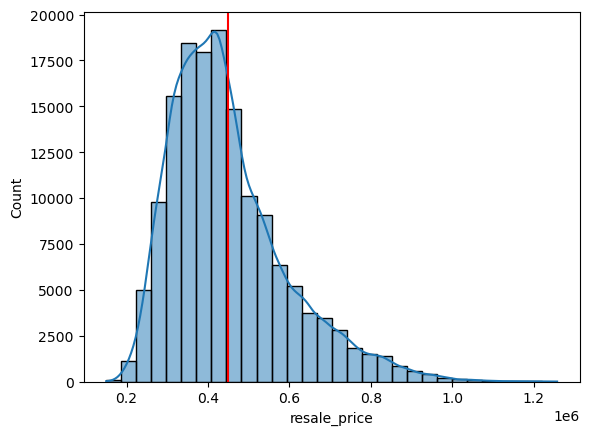

In [28]:
sns.histplot(df['resale_price'], kde=True, bins = 30)
plt.axvline(x=df['resale_price'].mean(),
            color='red');

In [29]:
df['resale_price'].describe()

count    1.498050e+05
mean     4.486621e+05
std      1.432125e+05
min      1.500000e+05
25%      3.460000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

As shown below, shapiro might not be accurate. Nonetheless, p-value < 0.05 and so we reject the null hypothesis that 'resale_price' is normally distributed.\
Visually, 'resale_price' does not seem normal either. It has significant right-skew.

In [30]:
from scipy.stats import shapiro
shapiro(df['resale_price'])

C:\Users\samue\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9322645664215088, pvalue=0.0)

We now proceed with spliting our data into continuous features and categorical features.\
This is done so that we can more effectively conduct eda for the associated data type.

In [31]:
categorical = df.dtypes[df.dtypes == 'object'].index
continuous = df.dtypes[df.dtypes != 'object'].index

Plotting the heatmap of correlation for the whole dataset to check for multicollinearity

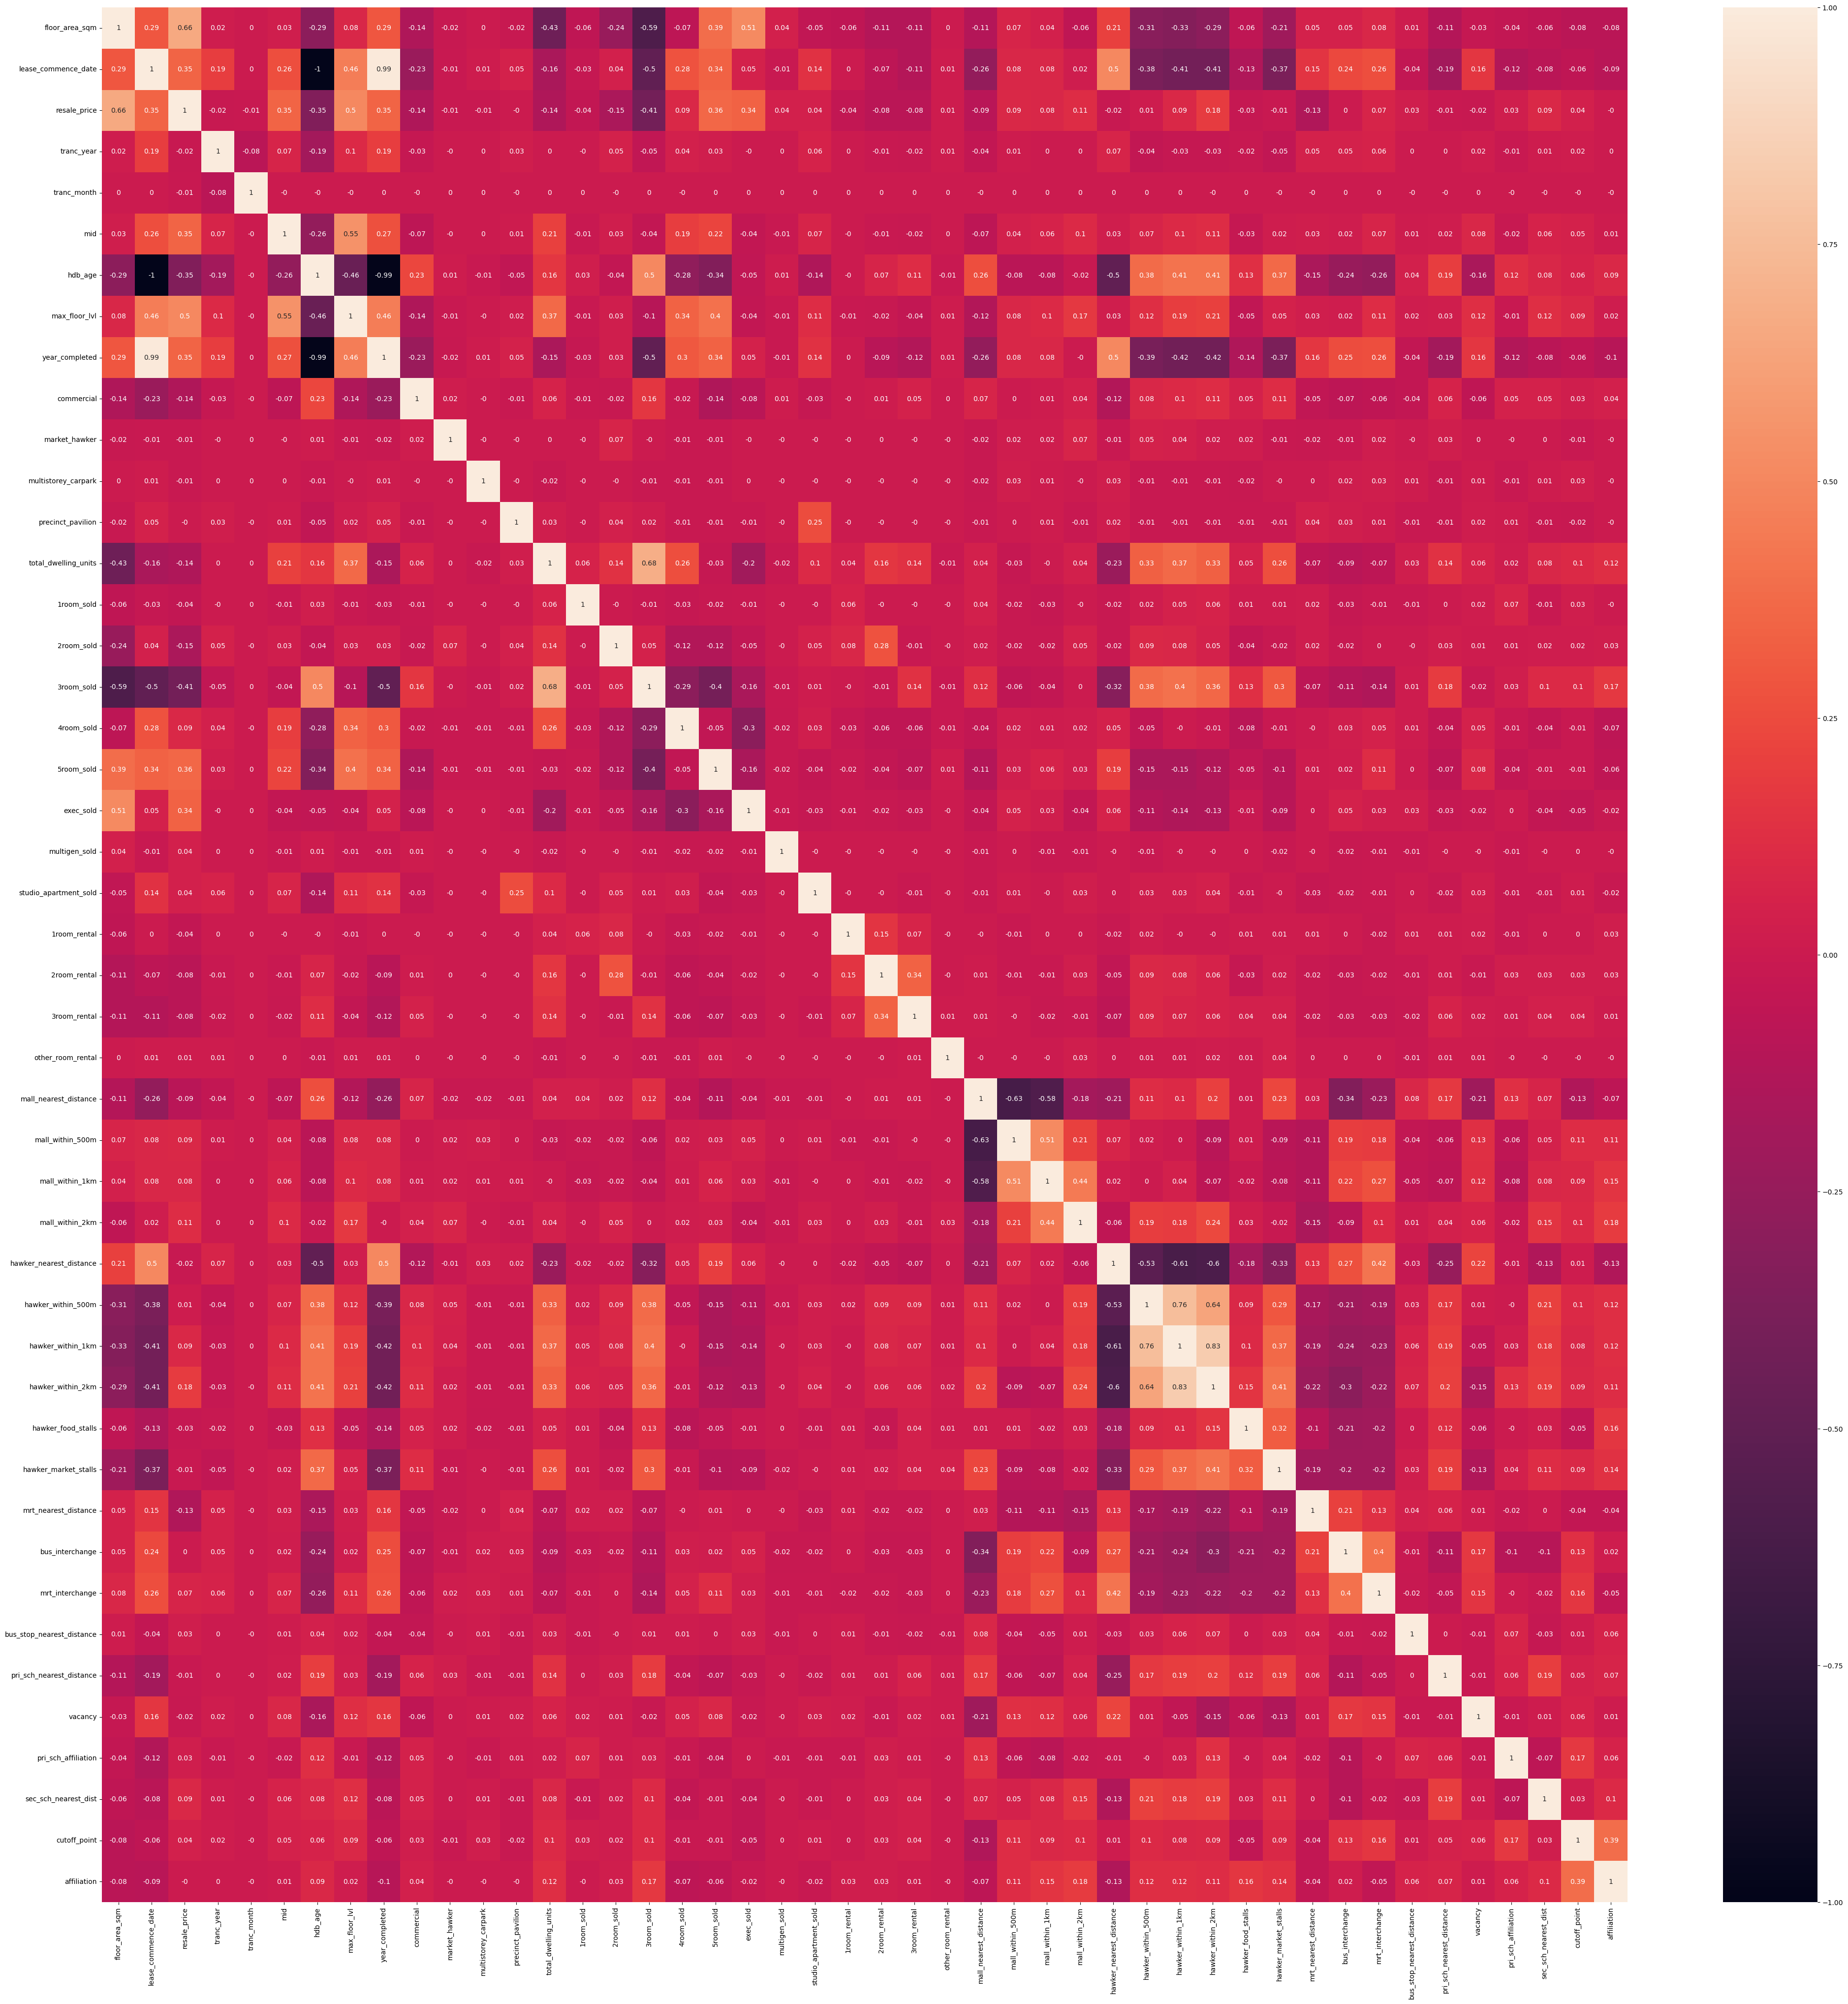

In [32]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr().round(2), annot=True);

As shown, heatmaps are quite useless with so many features. We will generally rely on filtering instead.

In [33]:
df[['hdb_age', 'lease_commence_date', 'year_completed']].corr()

hdb_age  lease_commence_date  year_completed
hdb_age              1.000000            -1.000000       -0.988677
lease_commence_date -1.000000             1.000000        0.988677
year_completed      -0.988677             0.988677        1.000000

Multicollinearity is observed in the above 3 features. We shall drop two of them.

In [34]:
continuous = continuous.drop(['lease_commence_date', 'year_completed'])

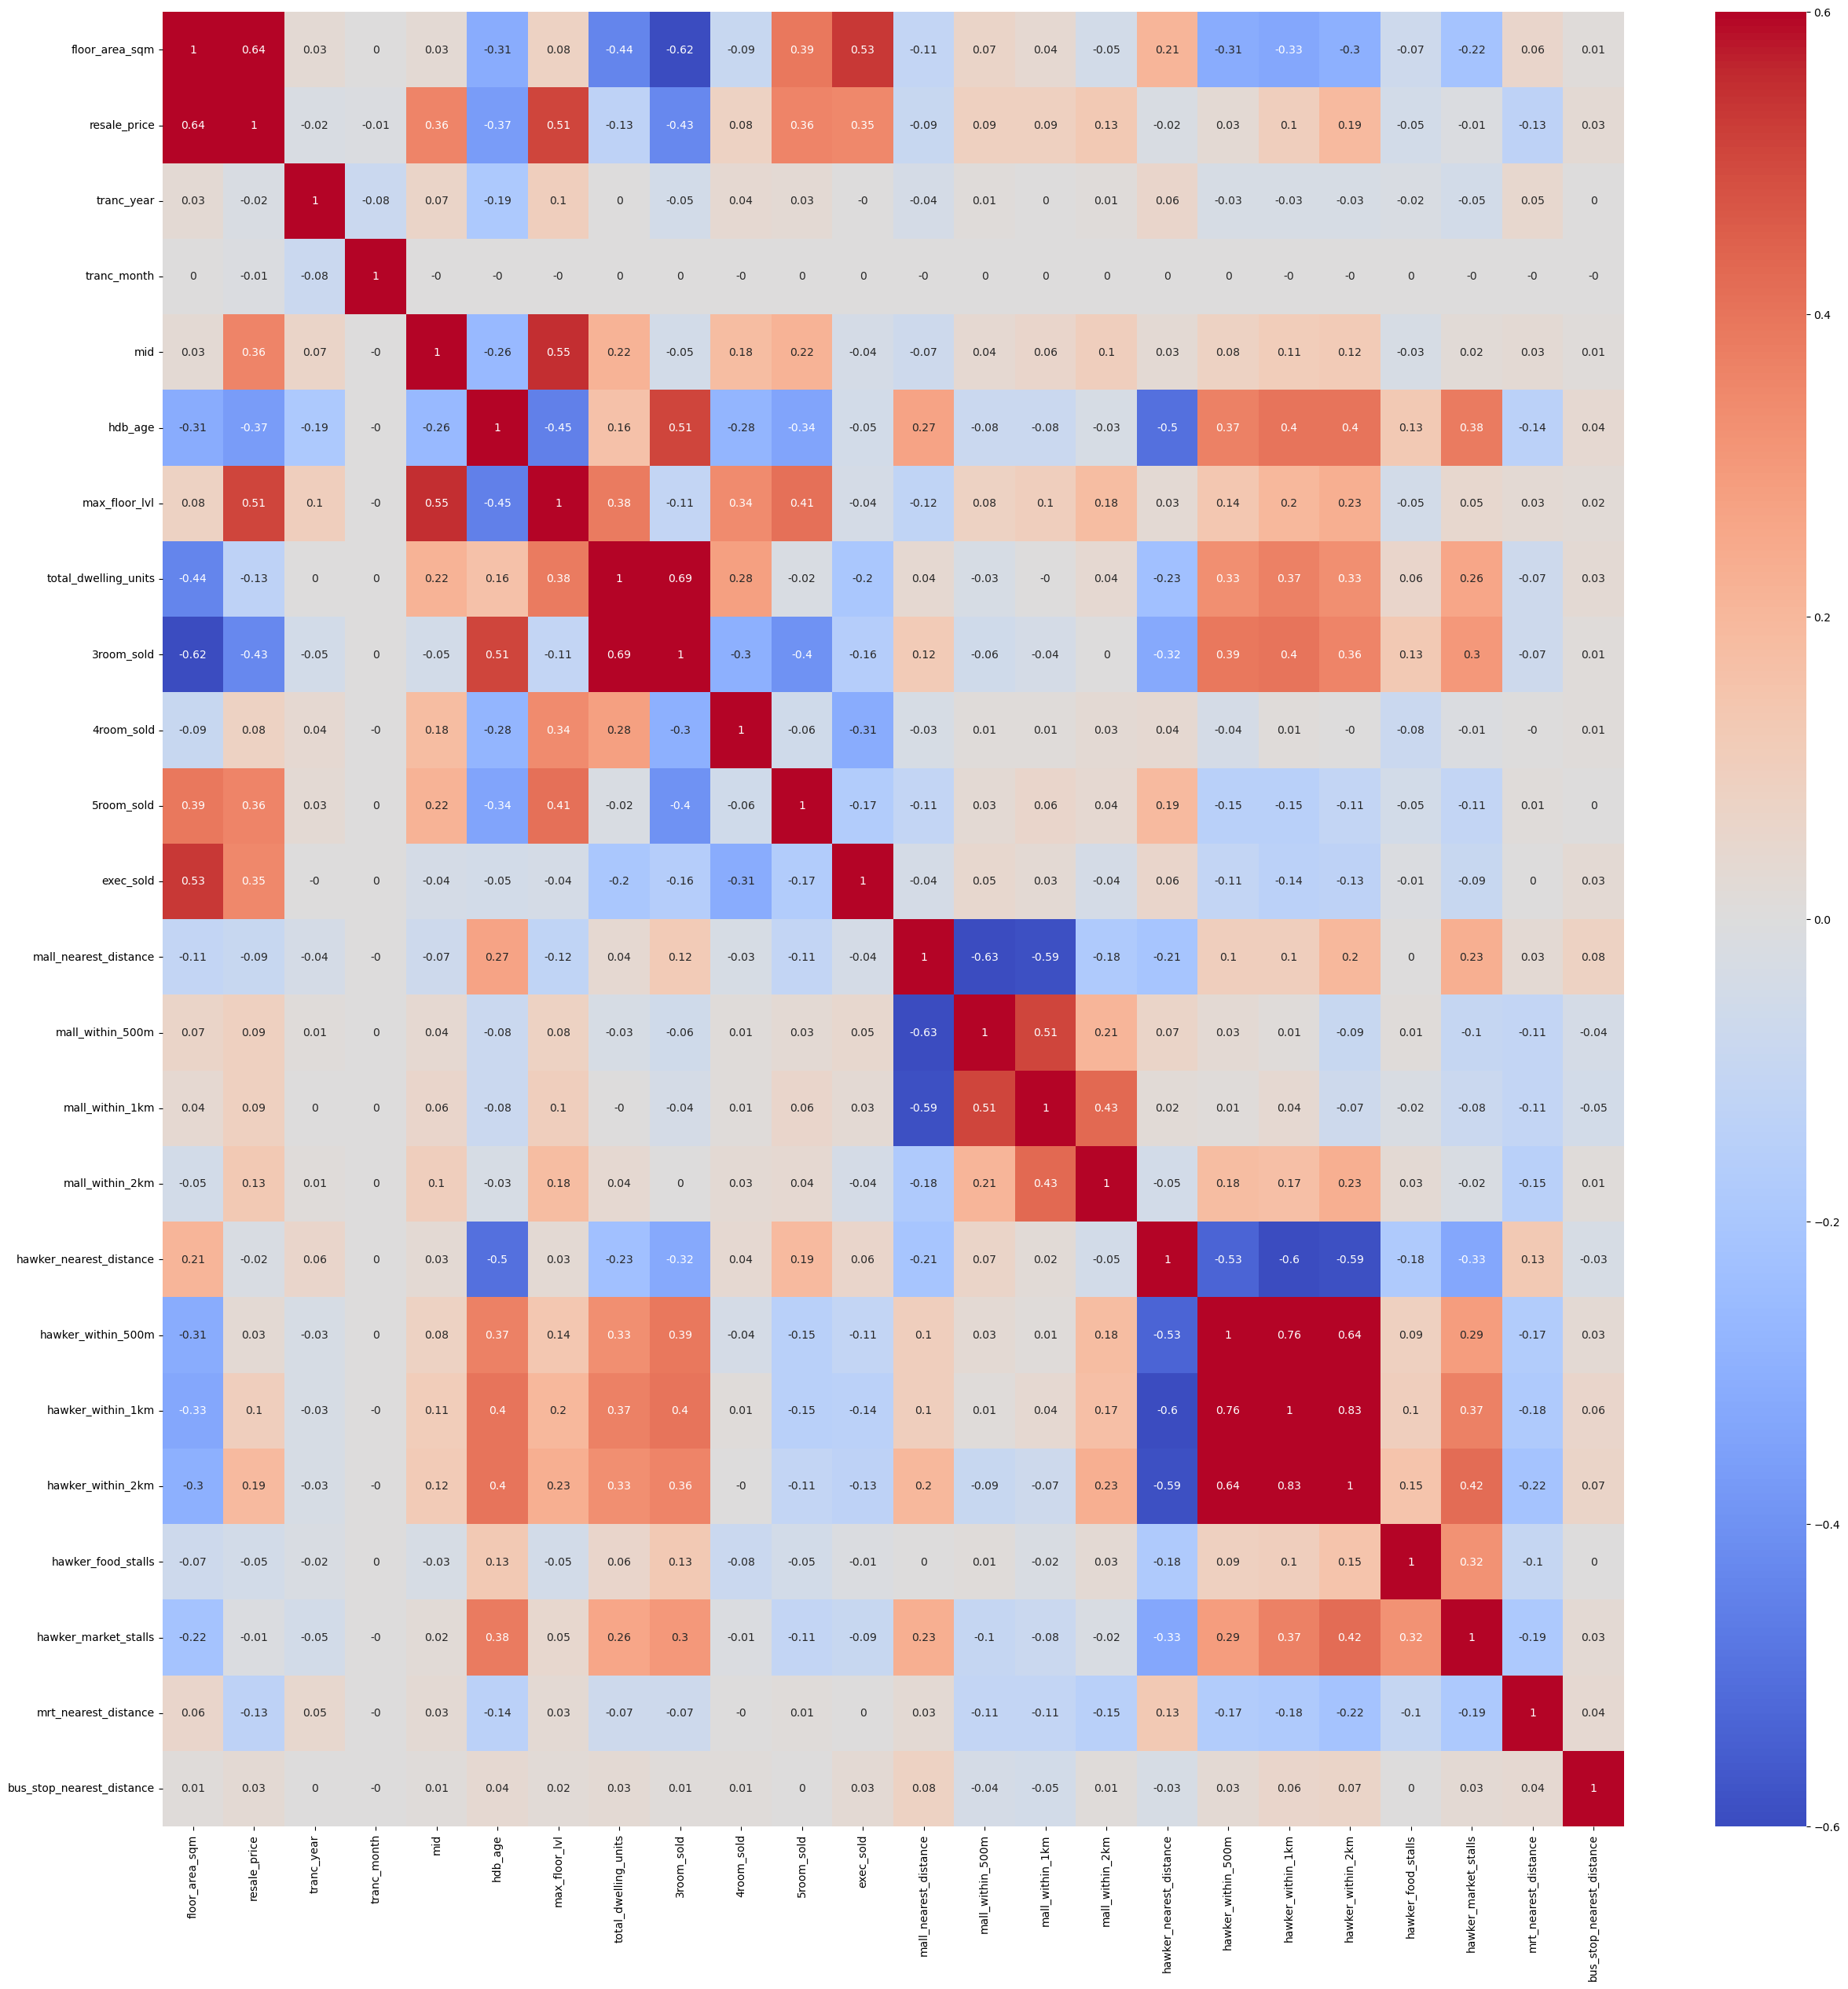

In [71]:
plt.figure(figsize = (30,30))
sns.heatmap(df[continuous].corr().round(2), annot=True, vmin=-0.6, vmax = 0.6, cmap = 'coolwarm');

In a 2017 property [news](https://www.edgeprop.sg/property-news/your-property-agent-says-eight-factors-determine-property%E2%80%99s-value) on [edgeprop](https://www.edgeprop.sg/), property agents gave a few of the important factors with regards to sale price. The ones that are relevant to us are:
- Location, distance to amenities:
    - Mrt
    - Bus stops
    - Schools
    - Malls (mentioned in particular are supermarkets) 
    - Hawkers
- Height, as in at which floor the flat is at. We will be using 'mid' as the feature for this.
- Age of the house
- Size

As the heatmap is showing, the features (of consideration as specified in the list above) correlated to 'resale_price' are 'floor_area_sqm', 'mid', 'hdb_age', max_floor_lvl, whereas distance to amenities do not have any correlation. This is counter-intuitive to what we understand.
We examine those features which show some positive/negative correlation.

In [36]:
df_cont_corr = df[continuous].corr()
features = df_cont_corr[abs(df_cont_corr['resale_price']) > 0.3]['resale_price'].index
features = features.drop('resale_price')

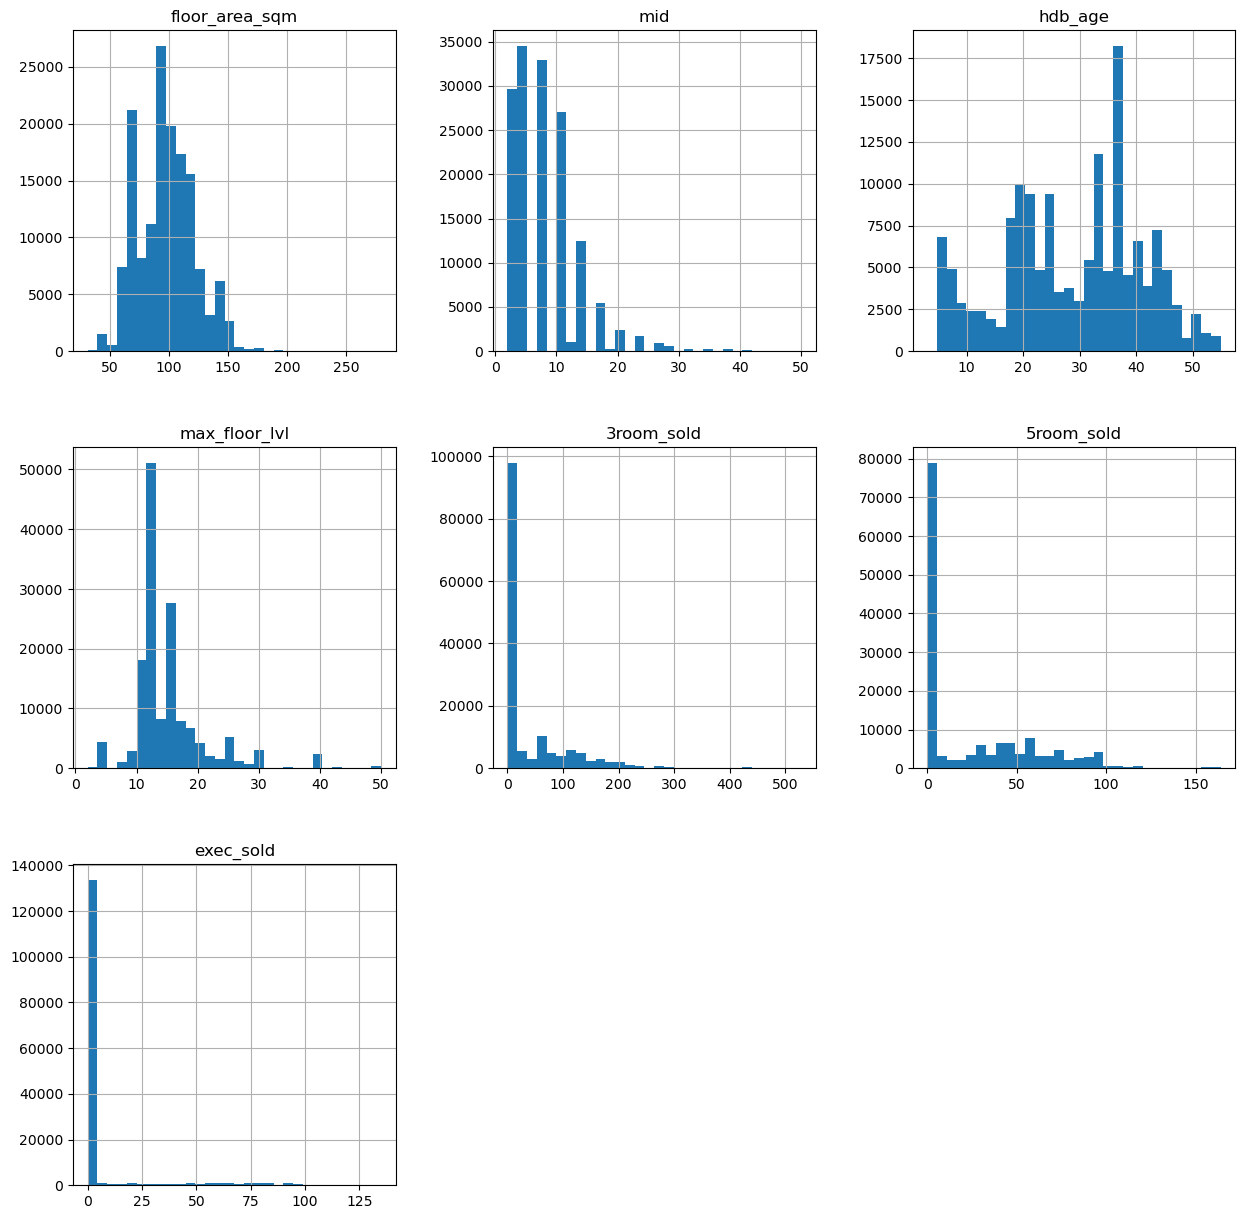

In [37]:
df[features].hist(figsize=(15,15), bins=30);

- floor_area_sqm
    - Most of the flats sold are between 50-120 sqm. 
- mid
    - Most of the flats sold on floors 2-12, with very little flats above the 20th floor sold.
- hdb_age
    - There seems to be more sales of hdb flats that are aged between 20-40 years as compared to those aged around 10 years.
- max_floor_lvl
    - Most of the flats sold belongs to blocks of height about 15 floors

The x_sold features measures how many flats of type x are in the same block as the flat that was sold.
- 3room_sold
    - Most of the flats that were sold had up to 50 3-room flats within the same block.
- 5room_sold
    - Most of the flats that were sold had up to 15 5-room flats within the same block.
- exec_sold
    - Most of the flats that were sold had up to 12 exec flats within the same block.
    - There are close to 140,000 occurances as compared to our dataset having about 150,000 rows, suggesting that there are exec flats in almost every hdb block built.


We also plot the histogram for the other features, deleting those features which we find would not be helpful.

In [38]:
len(continuous.drop(features).drop('resale_price'))

36

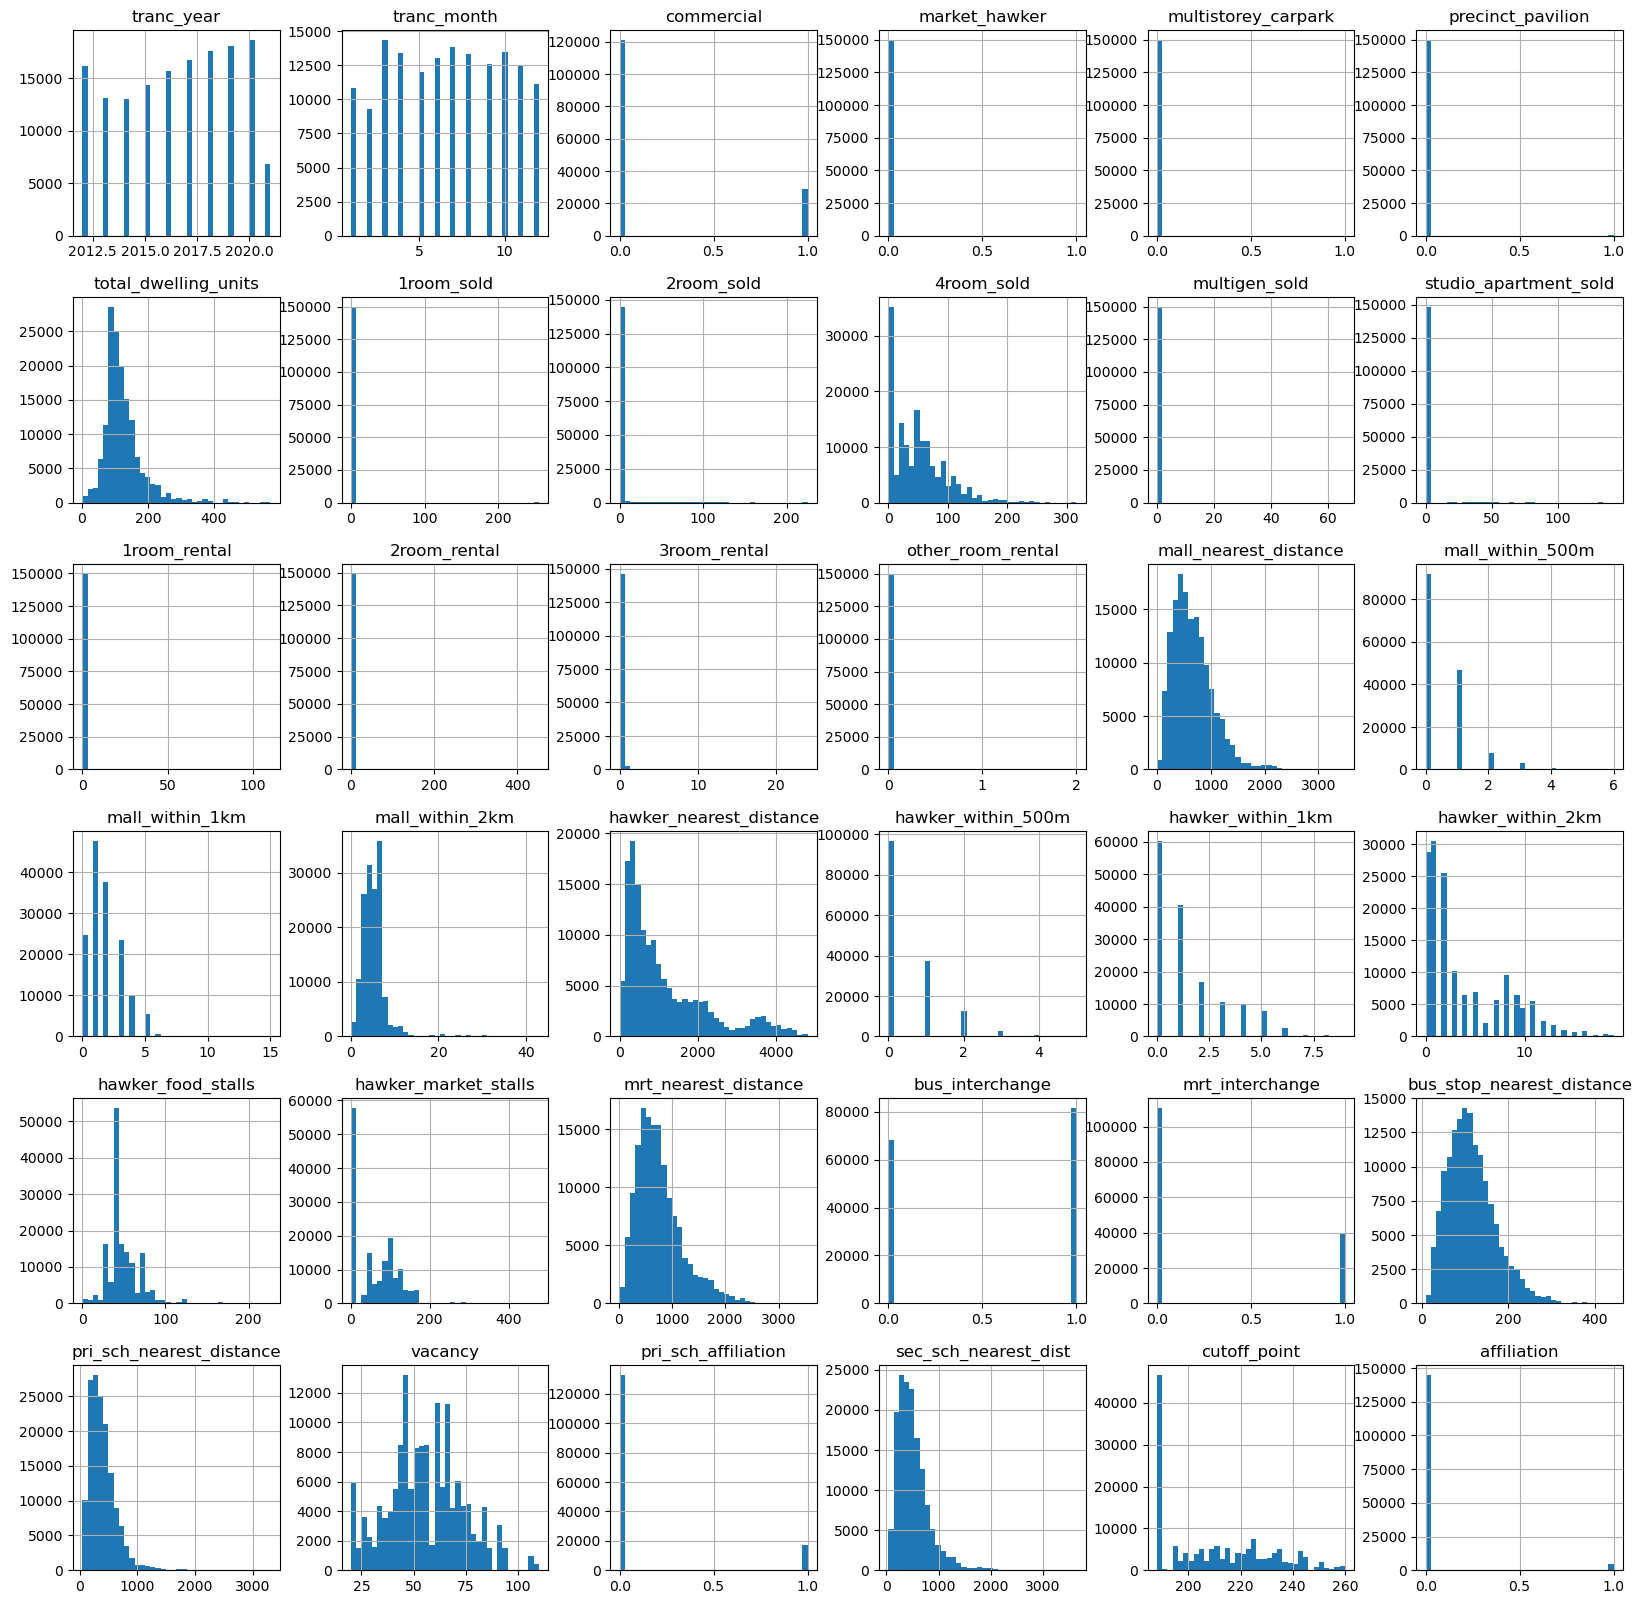

In [39]:
df[continuous.drop(features).drop('resale_price')].hist(figsize=(20,20), bins=36);

Some of the features such as 'market_hawker', 'multistorey_carpark' and 'precinct_pavilion' are too sparse to be able to provide any meaningful information. We will drop all features which has an overwhelming representation in one bin. 

In [40]:
continuous

Index(['floor_area_sqm', 'resale_price', 'tranc_year', 'tranc_month', 'mid',
       'hdb_age', 'max_floor_lvl', 'commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', 'total_dwelling_units',
       '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mrt_nearest_distance', 'bus_interchange',
       'mrt_interchange', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'sec_sch_nearest_dist', 'cutoff_point', 'affiliation'],
      dtype='object')

In [41]:
continuous = continuous.drop(['commercial', 'market_hawker',
       'multistorey_carpark', 'precinct_pavilion', '1room_sold', '2room_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental',
       '2room_rental', '3room_rental', 'other_room_rental','bus_interchange', 'mrt_interchange', 'pri_sch_affiliation', 'affiliation'])

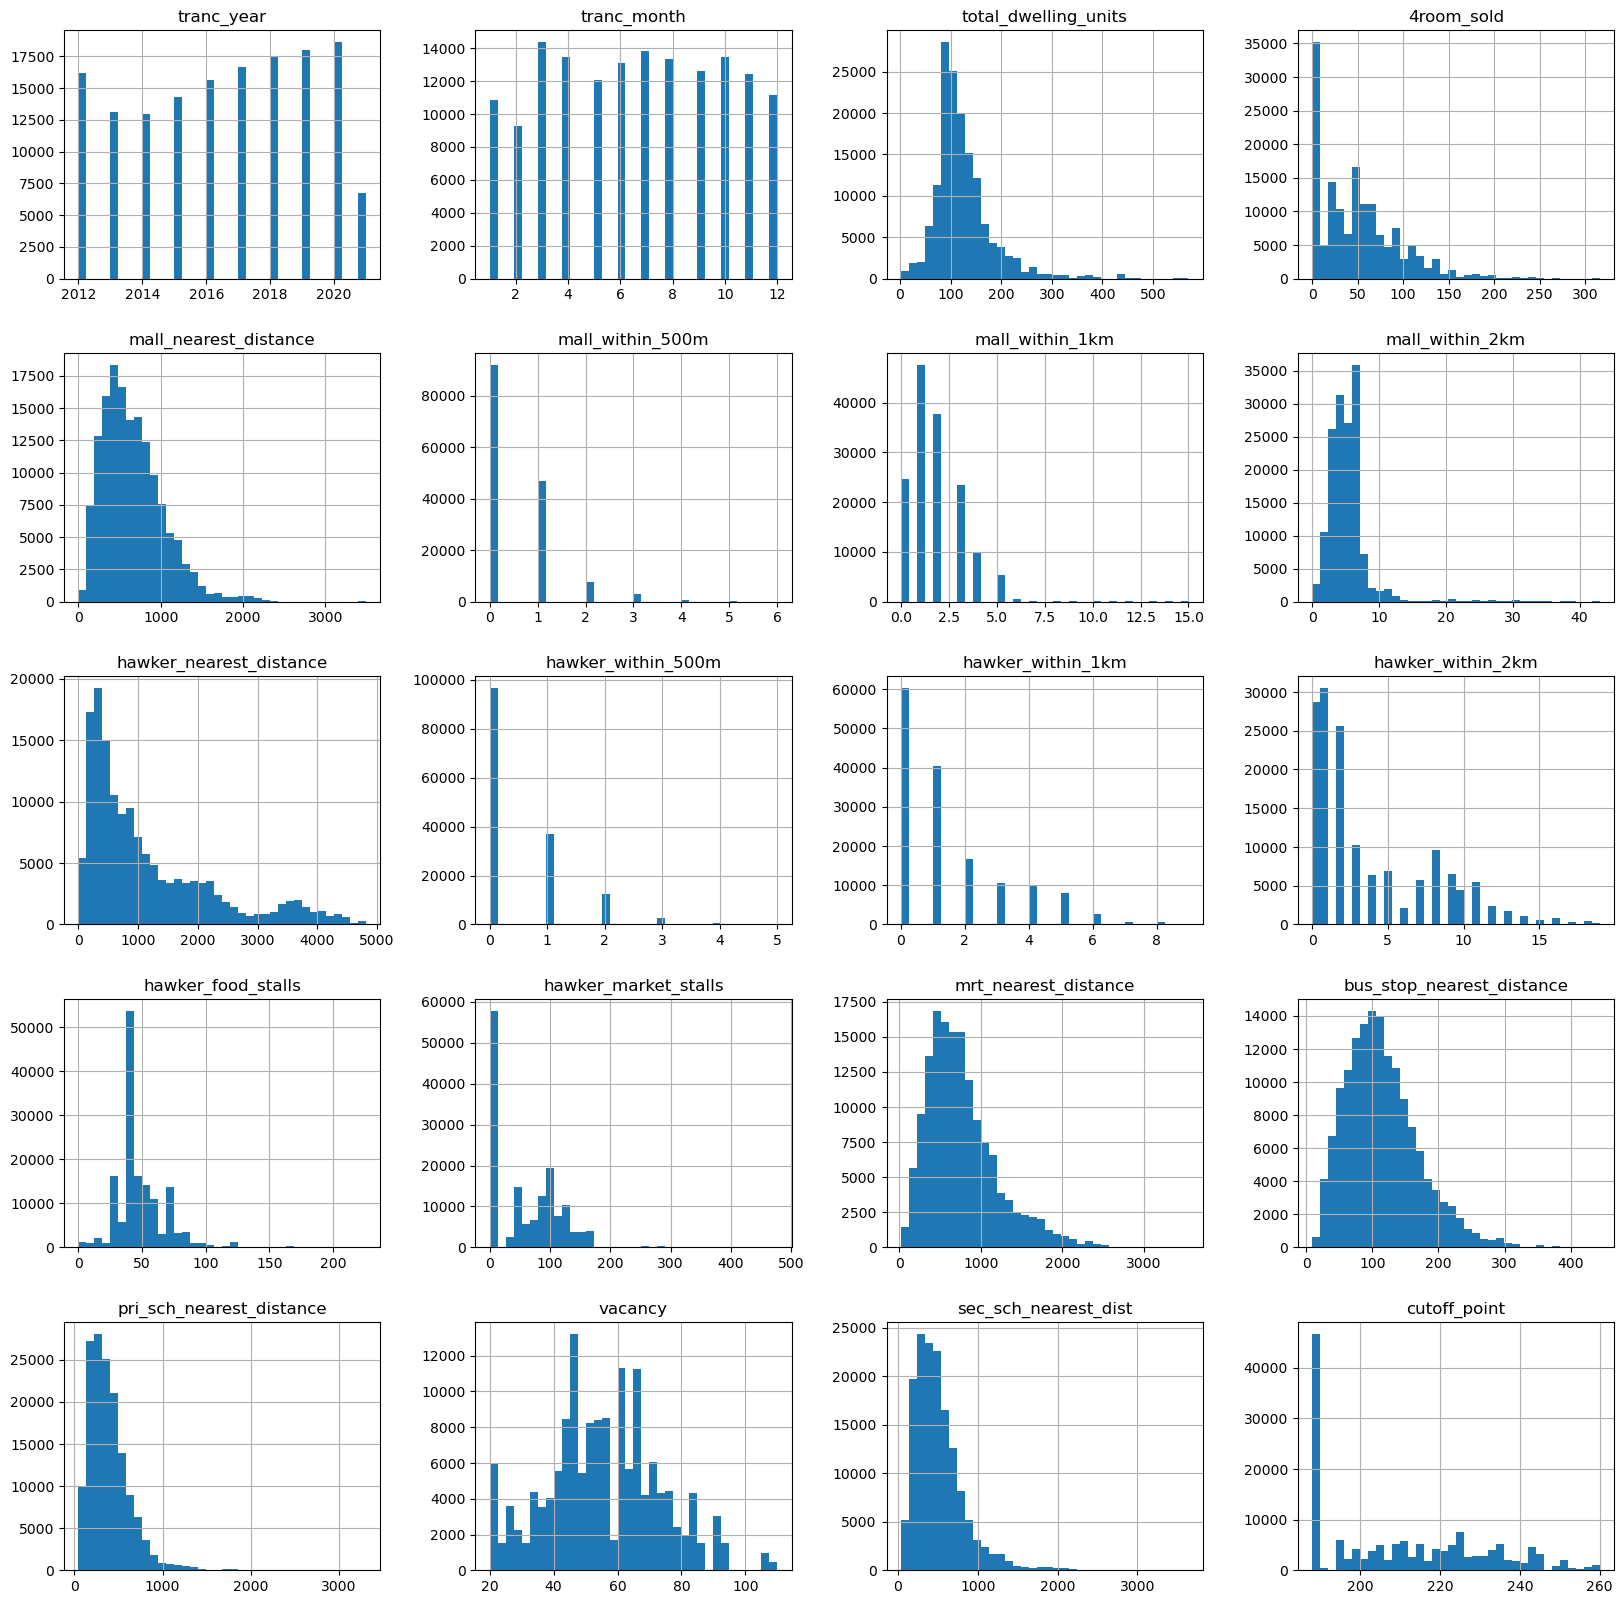

In [42]:
df[continuous.drop(features).drop('resale_price')].hist(figsize=(20,20), bins=36);

<a id='back2'></a>Finally, we drop the features related to school (see [here](#school) for explanation).

In [43]:
continuous = continuous.drop(['pri_sch_nearest_distance', 'vacancy', 'sec_sch_nearest_dist', 'cutoff_point'])

The following are the scatterplots of the target 'resale_price' in the y-axis and feature in the x-axis.

<Figure size 2000x2000 with 0 Axes>

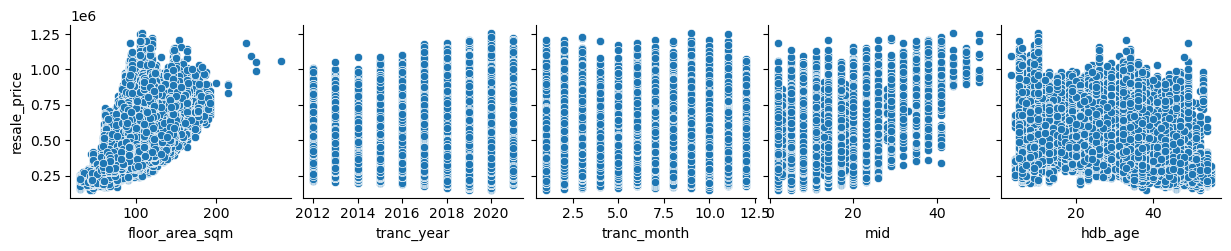

<Figure size 2000x2000 with 0 Axes>

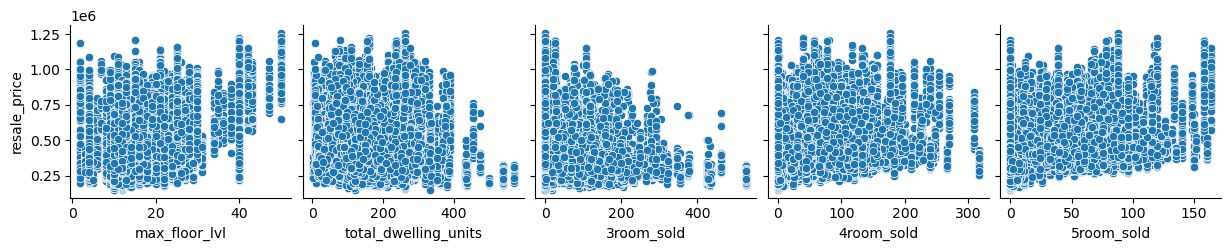

<Figure size 2000x2000 with 0 Axes>

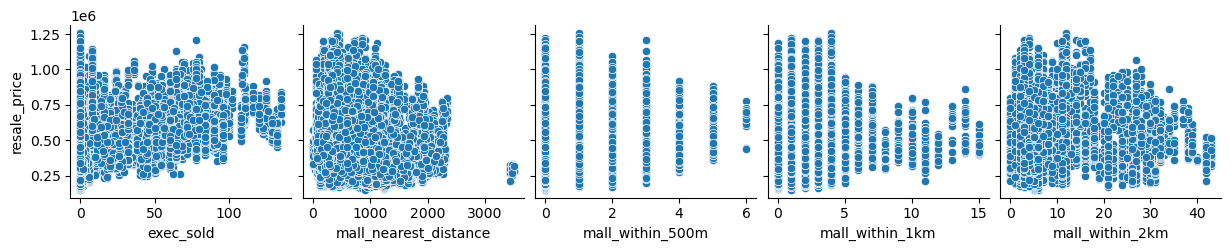

<Figure size 2000x2000 with 0 Axes>

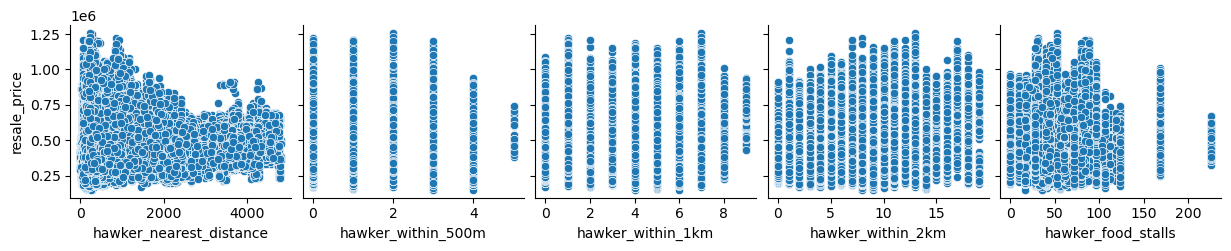

<Figure size 2000x2000 with 0 Axes>

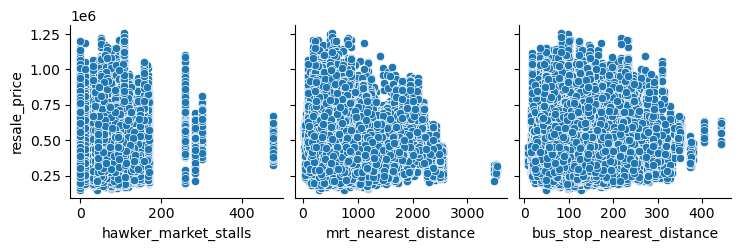

In [44]:
for i in range(5):    
    plt.figure(figsize=(20,20));
    sns.pairplot(df, y_vars = ['resale_price'], x_vars = continuous.drop(['resale_price'])[i*5:5*(i+1)]);

This block of code here is an idea at an attempted to model the fact that amenities (in this case hawkers) are preferred nearer than furthuer, and also that within a certain range, having more is better, but with diminishing returns. You will see this again in part 2 if we do decide to use it.

In [45]:
# df_test = df[['resale_price','hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km']].copy()
# df_test['hawker_500m'] = 3*np.log(df_test['hawker_within_500m']+1)
# df_test['hawker_500m_1km'] = 1.5*np.log(df_test['hawker_within_1km'] - df_test['hawker_within_500m']+1)
# df_test['hawker_1km_2km'] = 0.75*np.log(df_test['hawker_within_2km'] - df_test['hawker_within_1km'] - df_test['hawker_within_500m']+1)
# df_test = df_test.drop(columns = ['hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km'])

# sns.pairplot(data=df_test, x_vars=df_test.columns.drop('resale_price'), y_vars=['resale_price']);
# df_test.corr()

[Back to contents](#Contents:)

### Categorical

In [46]:
#Once again, we shamelessly steal this from Ryan.
def subplot_cat(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=False, squeeze=True, figsize=(25,50)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data = df, y = "resale_price",x = column, ax = ax[2*i])
        sns.countplot(data = df, x = column, ax = ax[2*i+1])
        ax[2*i].tick_params(axis='x', rotation=90)
        ax[2*i+1].tick_params(axis='x', rotation=90)
        ax[2*i+1].axhline(len(df) * 0.6, color = 'r', label = "Threshold", linewidth = 5)

In [47]:
for col in categorical:
    print(col, len(df[col].unique()))

town 26
flat_type 7
street_name 547
flat_model 20
planning_area 32
mrt_name 94
bus_stop_name 1637
pri_sch_name 177
sec_sch_name 134


In [48]:
df['town'].unique(), df['planning_area'].unique()

(array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
        'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
        'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
        'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
        'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
        'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object),
 array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
        'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
        'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
        'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
        'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
        'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
        'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object))

In [49]:
#street name has too many categories, town contained in planning_area, mrt_ and bus_stop names don't make sense.
categorical = categorical.drop(['street_name', 'town', 'mrt_name', 'bus_stop_name'])

In [50]:
categorical

Index(['flat_type', 'flat_model', 'planning_area', 'pri_sch_name',
       'sec_sch_name'],
      dtype='object')

In this next part, we will delete the categories from each feature that has very little representation (arbitrarily chosen threshold).\
This will reduce the number of columns when we one-hot encode for our baseline model. Of course, this would also mean that our model will only be able to take into account those categories which are present.

In [51]:
for area in df.groupby('planning_area').count().index:
    print(area, len(df[df['planning_area'] == area]))

Ang Mo Kio 6907
Bedok 9039
Bishan 2870
Bukit Batok 5700
Bukit Merah 5834
Bukit Panjang 5664
Bukit Timah 362
Changi 38
Choa Chu Kang 6201
Clementi 3628
Downtown Core 31
Geylang 3951
Hougang 7539
Jurong East 3431
Jurong West 11445
Kallang 3158
Marine Parade 943
Novena 1090
Outram 759
Pasir Ris 4708
Punggol 7614
Queenstown 4044
Rochor 468
Sembawang 3723
Sengkang 10894
Serangoon 3121
Tampines 10463
Tanglin 25
Toa Payoh 4804
Western Water Catchment 15
Woodlands 11299
Yishun 10037


In [52]:
for cat in df.groupby('planning_area').count().index:
    if len(df[df['planning_area'] == cat]) < 100:
        df = df.drop(df[df['planning_area'] == cat].index)

In [53]:
for model in df.groupby('flat_model').count().index:
    print(model, len(df[df['flat_model'] == model]))

2-room 4
Adjoined flat 260
Apartment 6079
DBSS 1639
Improved 38305
Improved-Maisonette 19
Maisonette 4362
Model A 45772
Model A-Maisonette 262
Model A2 2064
Multi Generation 56
New Generation 23366
Premium Apartment 14887
Premium Apartment Loft 50
Premium Maisonette 15
Simplified 7238
Standard 4854
Terrace 95
Type S1 242
Type S2 127


In [54]:
for cat in df.groupby('flat_model').count().index.drop(['Type S1', 'Type S2']):
    if len(df[df['flat_model'] == cat]) < 300:
        df = df.drop(df[df['flat_model'] == cat].index)

In [55]:
for ftype in df.groupby('flat_type').count().index:
    print(ftype, len(df[df['flat_type'] == ftype]))

1 ROOM 82
2 ROOM 1883
3 ROOM 38779
4 ROOM 60536
5 ROOM 35779
EXECUTIVE 11876


In [56]:
for ftype in df.groupby('flat_type').count().index:
    if len(df[df['flat_type'] == ftype]) < 2000:
        df = df.drop(df[df['flat_type'] == ftype].index)

In [57]:
df = df.reset_index()
df.shape

(146970, 56)

In an attempted to further reduce categories:\
Notice that Apartment and Maisonette are all executive, BUT there are executive premium apartments as well. Otherwise, we could have removed executive as a category.\
We also found that 'Type S1' and 'Type S2' both refer to The Pinnacle, under 'planning_area' 'Outram', which applies to close to half of the entries in 'Outram'. We choose not to delete those.

In [58]:
for model in df.groupby('flat_model').count().index:
    print(model,'\n', df[df['flat_model'] == model]['flat_type'].value_counts(), '\n')

Apartment 
 EXECUTIVE    6079
Name: flat_type, dtype: int64 

DBSS 
 5 ROOM    863
4 ROOM    598
3 ROOM    177
Name: flat_type, dtype: int64 

Improved 
 5 ROOM    25698
3 ROOM    10198
4 ROOM     1806
Name: flat_type, dtype: int64 

Maisonette 
 EXECUTIVE    4362
Name: flat_type, dtype: int64 

Model A 
 4 ROOM    34772
3 ROOM     8335
5 ROOM     1935
Name: flat_type, dtype: int64 

Model A2 
 4 ROOM    2064
Name: flat_type, dtype: int64 

New Generation 
 3 ROOM    15227
4 ROOM     8139
Name: flat_type, dtype: int64 

Premium Apartment 
 4 ROOM       7541
5 ROOM       5483
EXECUTIVE    1435
3 ROOM        391
Name: flat_type, dtype: int64 

Simplified 
 4 ROOM    5309
3 ROOM    1929
Name: flat_type, dtype: int64 

Standard 
 3 ROOM    2522
5 ROOM    1673
4 ROOM      65
Name: flat_type, dtype: int64 

Type S1 
 4 ROOM    242
Name: flat_type, dtype: int64 

Type S2 
 5 ROOM    127
Name: flat_type, dtype: int64 



In [59]:
for model in df.groupby('flat_model').count().index:
    print(model,'\n', df[df['flat_model'] == model]['planning_area'].value_counts(), '\n')

Apartment 
 Pasir Ris        949
Woodlands        847
Jurong West      723
Sengkang         602
Tampines         472
Choa Chu Kang    385
Sembawang        369
Hougang          296
Yishun           251
Bukit Panjang    239
Bukit Batok      235
Bedok            210
Serangoon        170
Jurong East      130
Ang Mo Kio        40
Toa Payoh         37
Bishan            32
Kallang           30
Geylang           23
Queenstown        20
Clementi          16
Bukit Timah        3
Name: planning_area, dtype: int64 

DBSS 
 Tampines       379
Toa Payoh      295
Kallang        193
Ang Mo Kio     167
Yishun         145
Bishan         131
Clementi       112
Bedok           77
Hougang         72
Jurong West     63
Pasir Ris        4
Name: planning_area, dtype: int64 

Improved 
 Jurong West      3316
Woodlands        3013
Sengkang         2701
Toa Payoh        2508
Tampines         2250
Bedok            2233
Bukit Merah      1985
Queenstown       1683
Hougang          1655
Choa Chu Kang    1553
Punggol

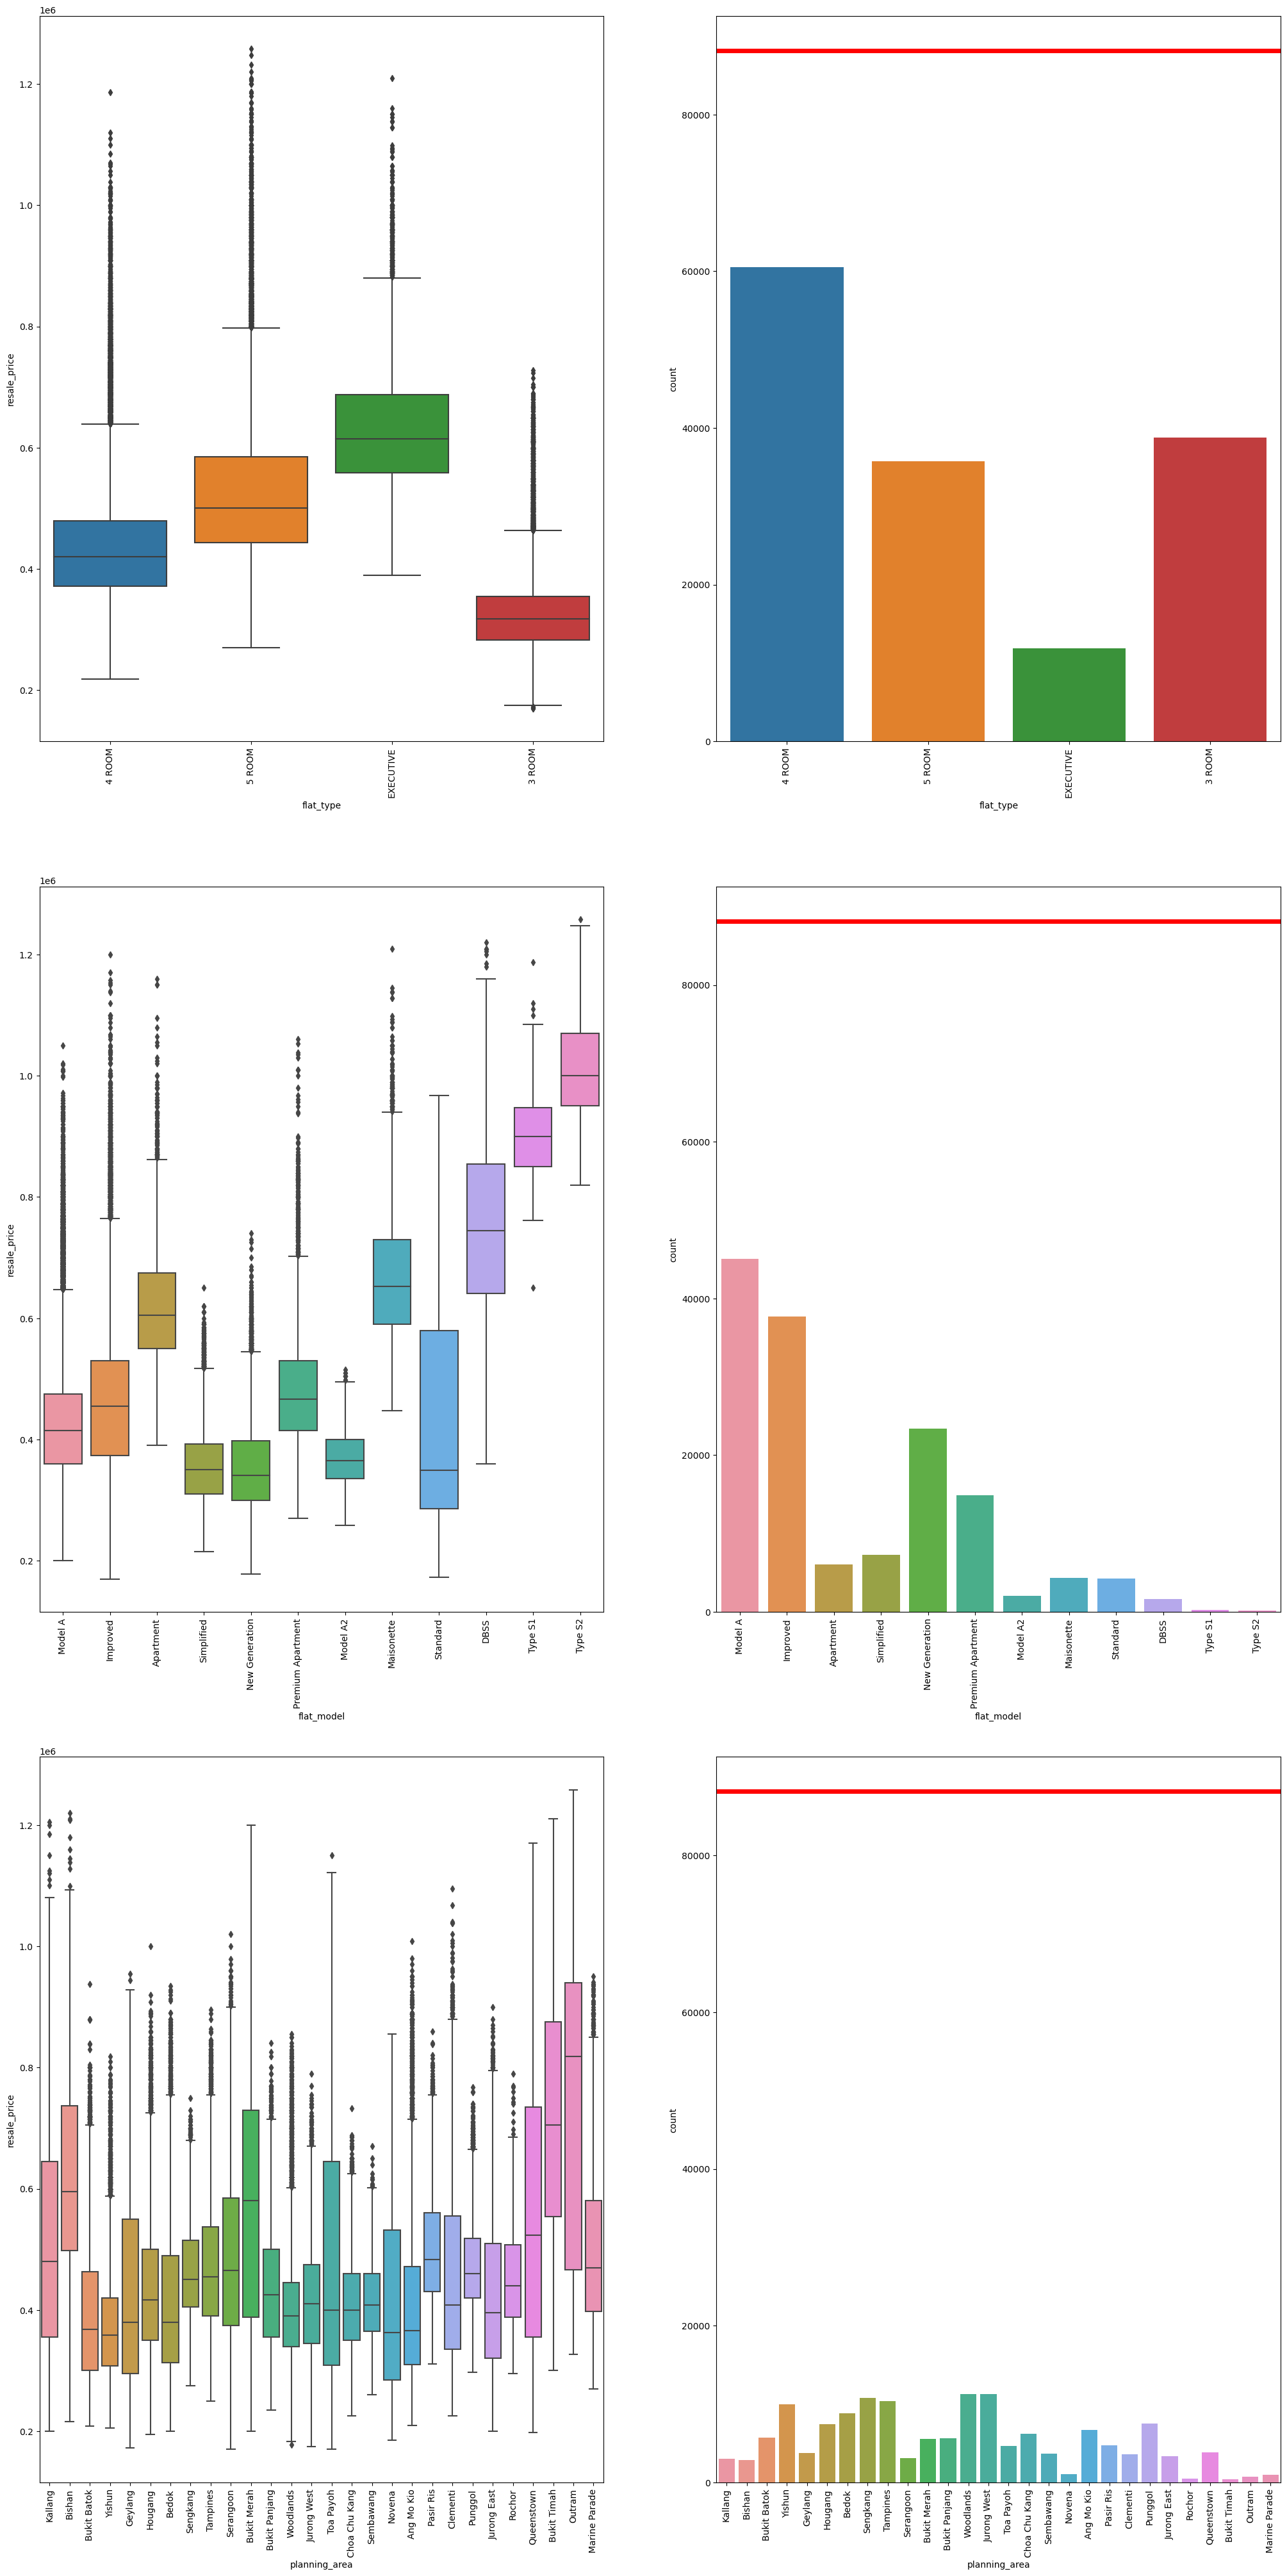

In [60]:
subplot_cat(df, categorical[:3])

Notice that there are MANY outliers selling way above the mean price for each of those features. These outliers are probably those flats that fall into some "sweet spot" of having large area, high floor, desirable amenities nearby, and maybe even a "good view" (subjective and not included in our data). In short, those outliers need to be explained by the other features.

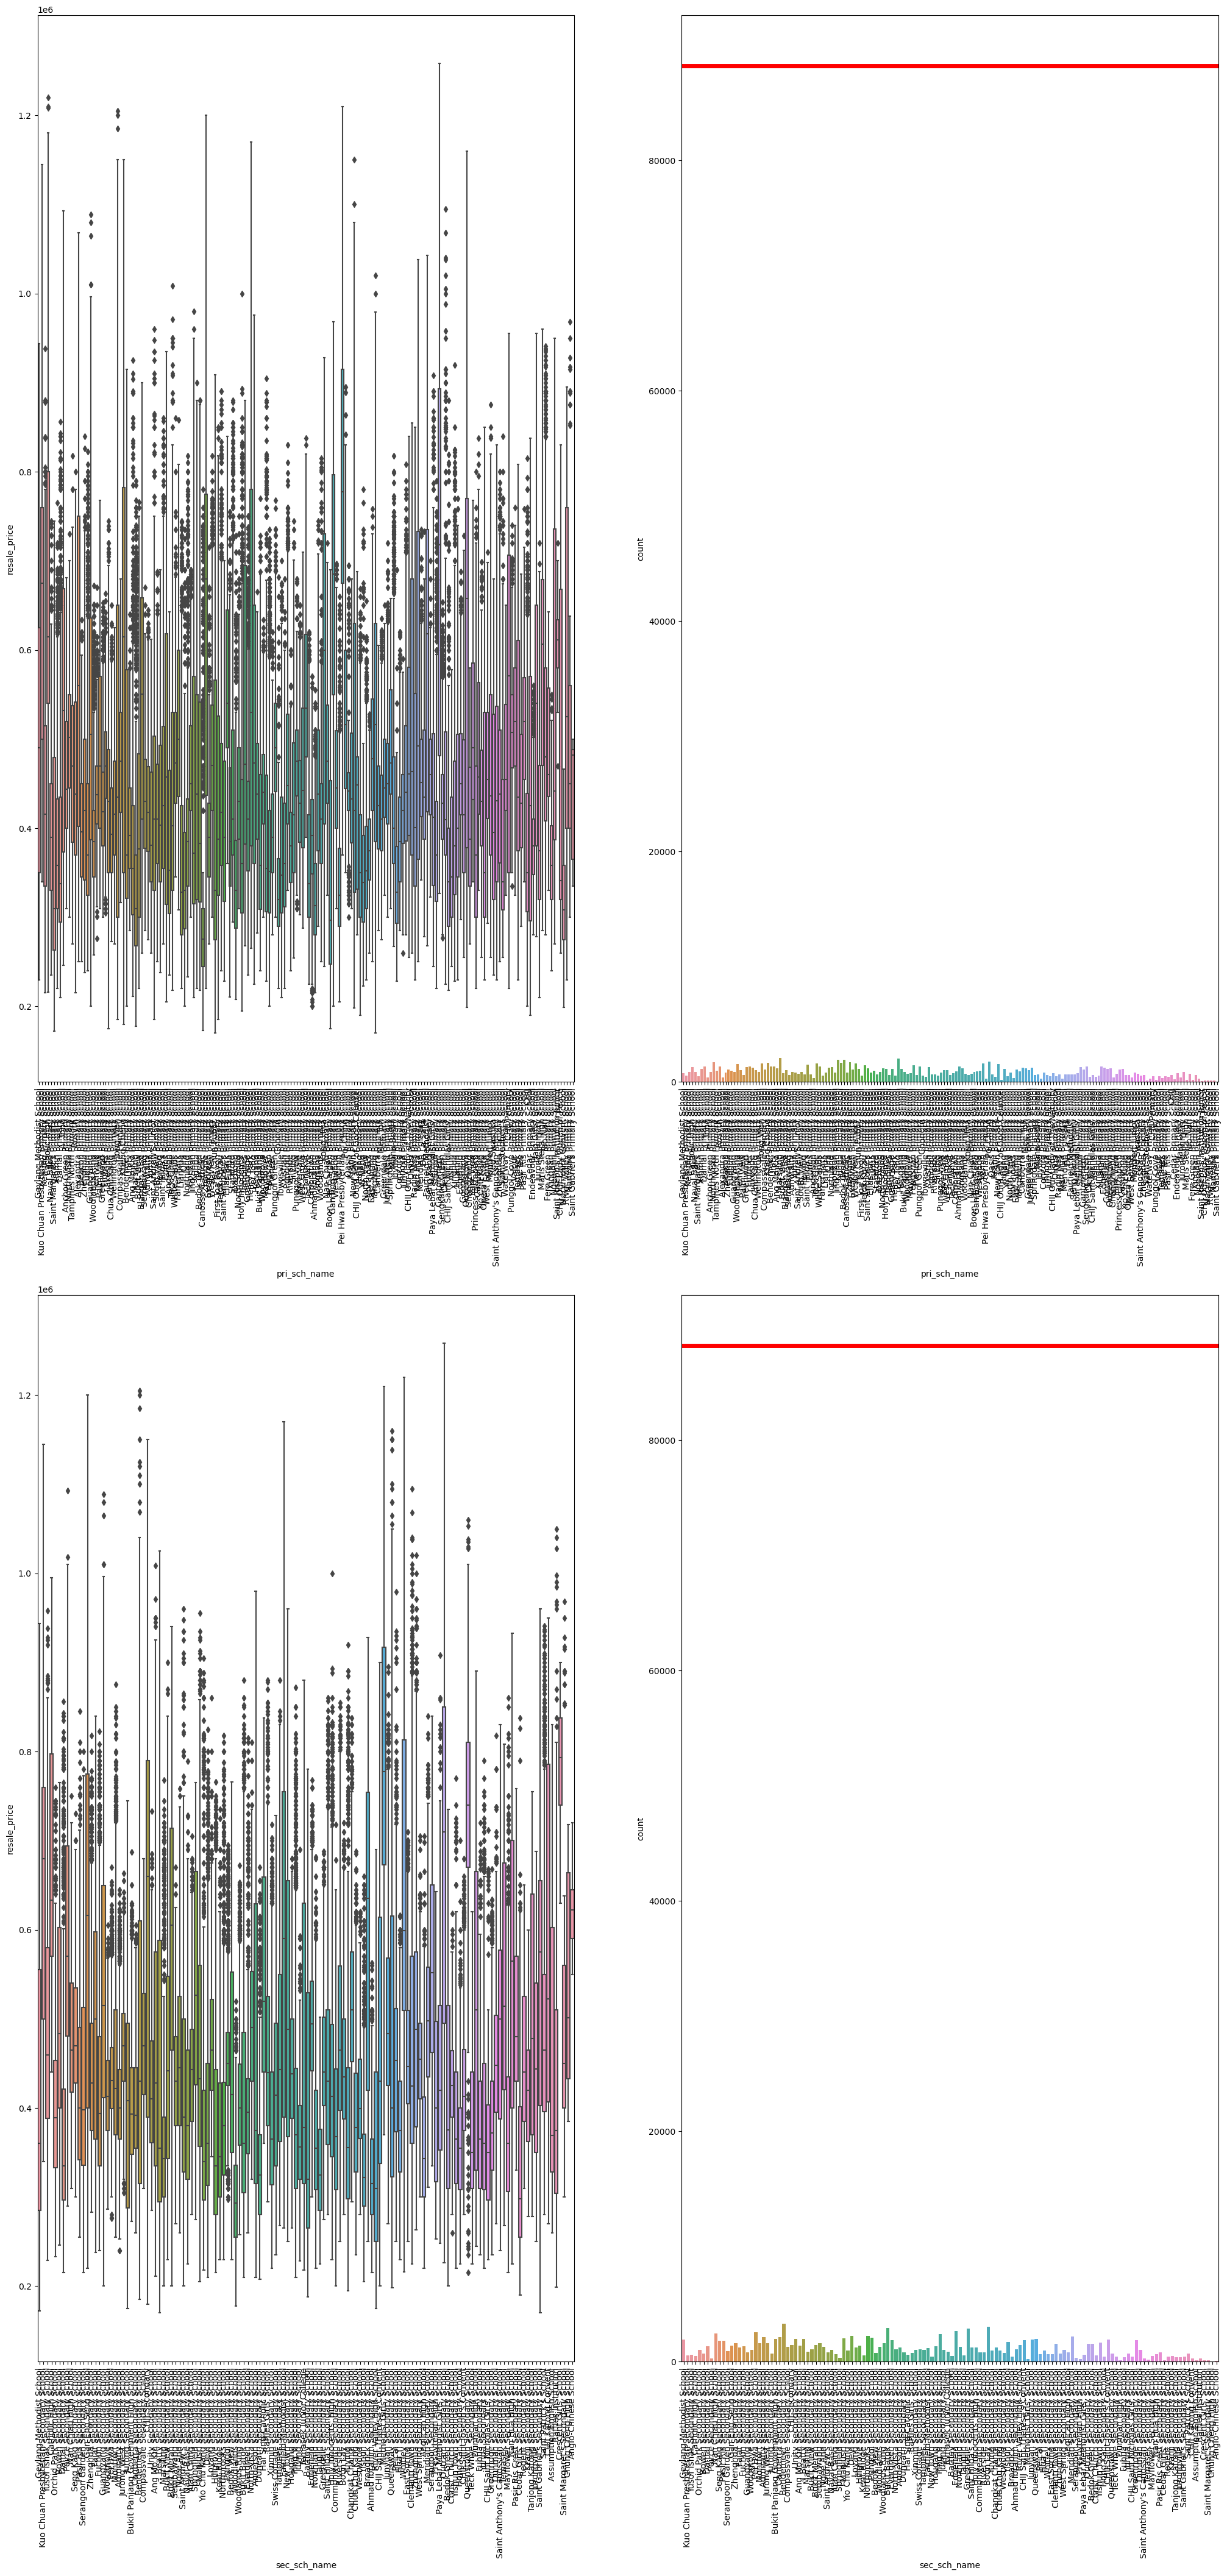

In [61]:
subplot_cat(df, categorical[3:])

Finally, for the schools, notice that the count plot is redundant. We will attempt to display properly the boxplot.

In [62]:
#Once again, we shamelessly steal AND EDIT this from Ryan.
def subplot_cat_mod(df, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=False, sharey=False, squeeze=True, figsize=(40,50)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data = df, y = "resale_price",x = column, ax = ax[i])
        ax[i].tick_params(axis='x', rotation=90)


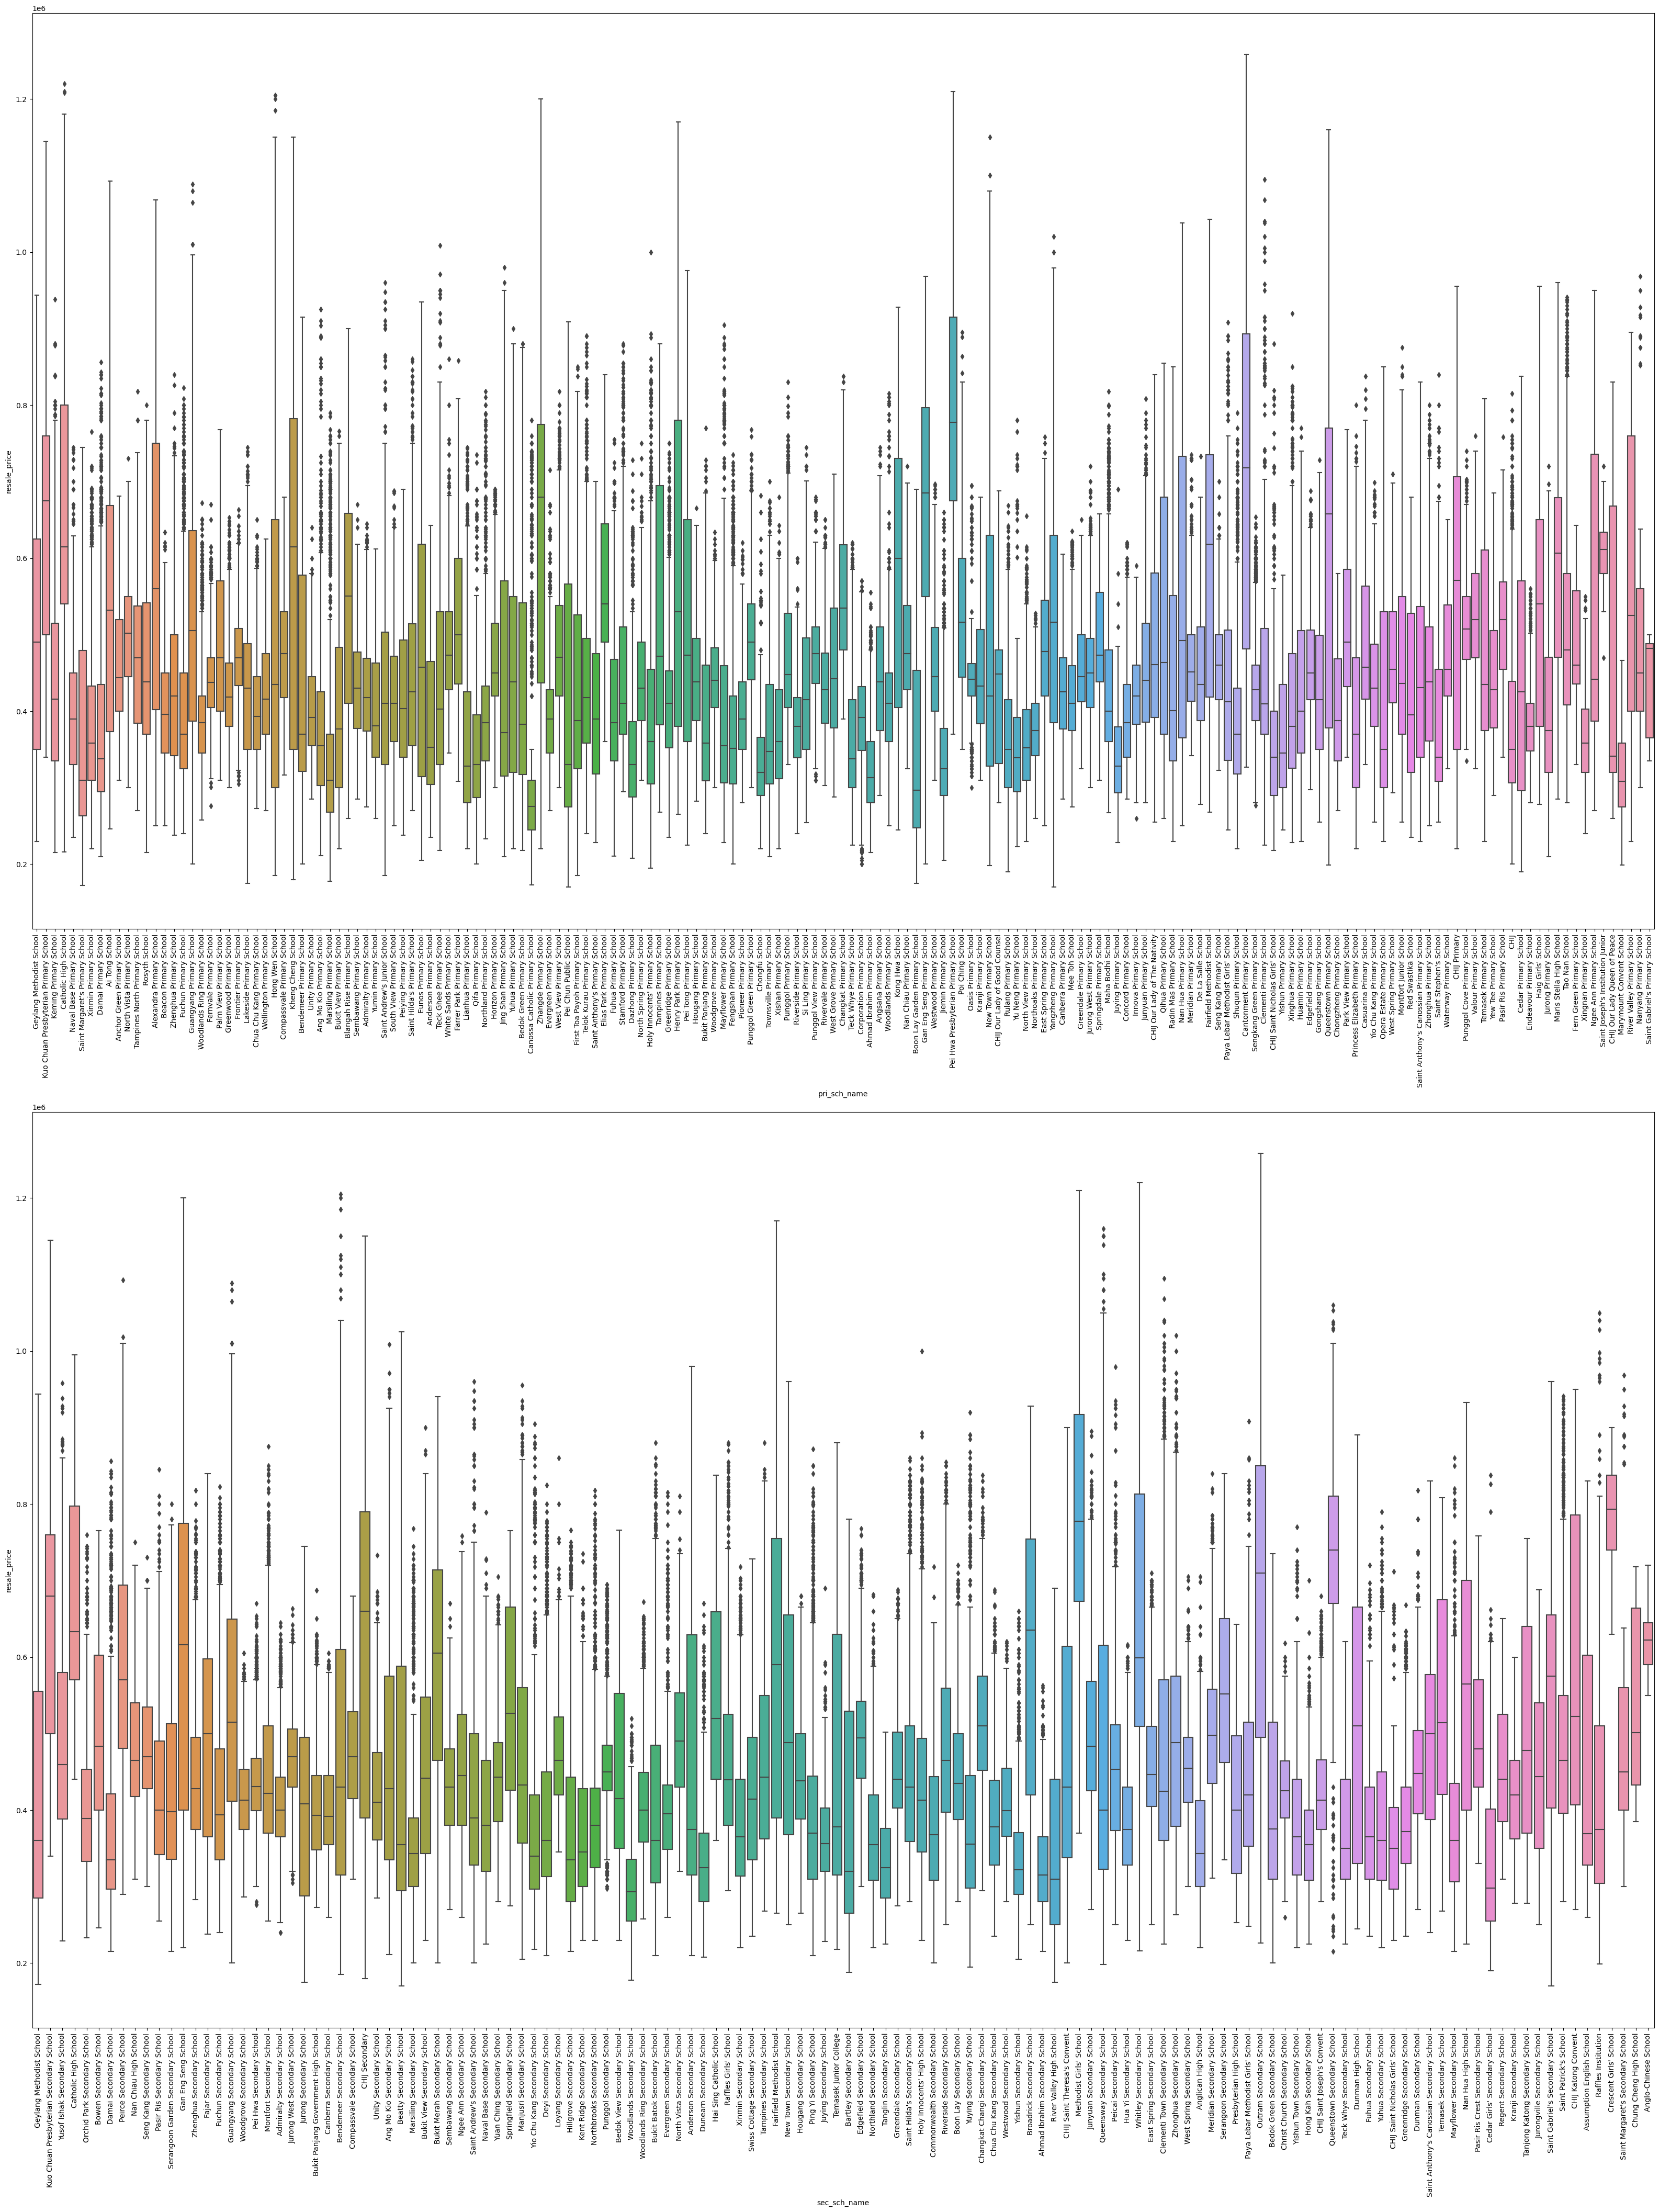

In [63]:
subplot_cat_mod(df, categorical[3:])

<a id='school'></a>Now, if you had a big enough screen, maybe you would be able to see the graph clearly. For our purposes though, notice that for each of the features, there are a few boxplots whose whiskers/extreme outliers stand out. We could try to extract information from these categories, but on their own, the information is probably not very useful.

We say this for 2 reasons, 
- It could be that the schools happen to be in an area that has high hdb prices for other reasons, i.e., it is just a coincidence that the hdb prices are high,
- without information on whether the kids in the household are studying in the schools, or whether the decision to move to the area was beecause they were hoping their kids would be able to get enrolled and all kinds of information along these lines, it's hard to decide if schools are indeed a cause for high hdb prices.

In fact, if you looked closely (if you are able to...), the schools with the "higher" boxplots are not the more famous schools.\
Therefore, time permitting, we would try to use these features as a bonus after completing the main bulk of our project (or as a future study?).

Some evidence supporting my claims:
- [Here](https://www.asiaone.com/singapore/do-hdb-flats-near-popular-primary-schools-really-cost-more)
- [Here](https://dollarsandsense.sg/hdb-property-prices-near-popular-primary-schools-really-cost/#:~:text=HDB%20Property%20Prices%20Near%20Popular%20Primary%20Schools%3A%20Do%20They%20Really%20Cost%20More%3F)

[Back](#back2)

In [64]:
categorical = categorical.drop(['pri_sch_name',
       'sec_sch_name'])

In [65]:
final = continuous.union(categorical)

In [66]:
df_final = df[final].copy()
df_final.head()

3room_sold  4room_sold  5room_sold  bus_stop_nearest_distance  exec_sold  \
0           0          96          46                  29.427395          0   
1           0          56          56                  58.207761          0   
2           0           0          30                 214.747860         60   
3           0          68           7                  43.396521          0   
4           0          30          18                 129.422752          0   

   flat_model  flat_type  floor_area_sqm  hawker_food_stalls  \
0     Model A     4 ROOM            90.0                  84   
1    Improved     5 ROOM           130.0                  80   
2   Apartment  EXECUTIVE           144.0                  84   
3     Model A     4 ROOM           103.0                  32   
4  Simplified     4 ROOM            83.0                  45   

   hawker_market_stalls  hawker_nearest_distance  hawker_within_1km  \
0                    60               154.753357                  3   
1                    77               640.151925                  1   
2                    95              1762.082341                  0   
3                    86               726.215262                  1   
4                     0              1540.151439                  0   

   hawker_within_2km  hawker_within_500m  hdb_age  mall_nearest_distance  \
0                 13                   1       15            1094.090418   
1                  7                   0       34             866.941448   
2                  1                   0       24            1459.579948   
3                  9                   0       29             950.175199   
4                  1                   0       34             729.771895   

   mall_within_1km  mall_within_2km  mall_within_500m  max_floor_lvl  mid  \
0                0                7                 0             25   11   
1                1                3                 0              9    8   
2                0                4                 0             16   14   
3                1                4                 0             11    3   
4                1                2                 0              4    2   

   mrt_nearest_distance planning_area  resale_price  total_dwelling_units  \
0            330.083069       Kallang      680000.0                   142   
1            903.659703        Bishan      665000.0                   112   
2           1334.251197   Bukit Batok      838000.0                    90   
3            907.453484        Bishan      550000.0                    75   
4            412.343032        Yishun      298000.0                    48   

   tranc_month  tranc_year  
0            5        2016  
1            7        2012  
2            7        2013  
3            4        2012  
4           12        2017

In [67]:
df_final.to_csv('datasets/train-clean.csv', index = False)

[Back to contents](#Contents:)

**The following is to support the last parts of part 2** 

In [68]:
df.groupby('tranc_year').mean()['resale_price']

tranc_year
2012    465406.432598
2013    477503.908106
2014    444264.165783
2015    434704.690125
2016    439171.801170
2017    445547.953645
2018    442358.176572
2019    434605.667628
2020    453276.412773
2021    489348.415509
Name: resale_price, dtype: float64

In [69]:
df.groupby('tranc_year').mean()['resale_price'] > df['resale_price'].mean()

tranc_year
2012     True
2013     True
2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020     True
2021     True
Name: resale_price, dtype: bool

mean price of year > mean price of individual transactions

In [70]:
df['resale_price'].mean()

449918.5816763283